In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/workspaces/Final_Project_DataScient/data/processed/data_ready.csv")
df

gender  missed_care_cost  insurance  test_hiv  sleep_time  \
0          2.0               0.0        0.0       0.0         0.0   
1          2.0               0.0        0.0       1.0         0.0   
2          2.0               0.0        0.0       0.0         0.0   
3          1.0               0.0        0.0       0.0         0.0   
4          2.0               0.0        0.0       0.0         0.0   
...        ...               ...        ...       ...         ...   
178882     2.0               0.0        0.0       1.0         0.0   
178883     2.0               0.0        0.0       1.0         0.0   
178884     2.0               1.0        1.0       0.0         2.0   
178885     1.0               0.0        0.0       1.0         2.0   
178886     1.0               1.0        1.0       0.0         2.0   

        drugs_prostit  act_fisica  heavy_drinker  ADDEPEV3  covid_pos  ...  \
0                 0.0         0.0            0.0       1.0        0.0  ...   
1                 0.0         1.0            0.0       1.0        1.0  ...   
2                 0.0         1.0            0.0       0.0        0.0  ...   
3                 0.0         1.0            0.0       0.0        0.0  ...   
4                 0.0         0.0            0.0       0.0        0.0  ...   
...               ...         ...            ...       ...        ...  ...   
178882            0.0         1.0           -1.0       1.0        1.0  ...   
178883            0.0         1.0            0.0       0.0        0.0  ...   
178884            0.0         0.0           -1.0       0.0        0.0  ...   
178885            0.0         0.0            0.0       0.0        1.0  ...   
178886            0.0         1.0            1.0       0.0        0.0  ...   

        trauma_exposure_score  gun_risk_score  estado_civil  \
0                         1.0             0.0        Casado   
1                         0.0             0.0        Casado   
2                         0.0             0.0        Casado   
3                         0.0             0.0        Casado   
4                         0.0             0.0        Casado   
...                       ...             ...           ...   
178882                    1.0             0.0       Soltero   
178883                    0.0             0.0        Casado   
178884                    2.0             0.0        Casado   
178885                    0.0             0.0        Casado   
178886                    1.0             0.0         Viudo   

        situacion_vivienda  servicio_militar  situacion_laboral   edad  \
0                   Propia               1.0           Empleado  36-65   
1                   Propia               1.0           Empleado  18-35   
2                   Propia               1.0           Jubilado  36-65   
3                   Propia               0.0        Desempleado  18-35   
4                Alquilado               1.0           Empleado  36-65   
...                    ...               ...                ...    ...   
178882           Alquilado               1.0           Empleado  18-35   
178883              Propia               0.0           Empleado  36-65   
178884                Otro               1.0        Desempleado    66+   
178885           Alquilado               1.0           Jubilado    66+   
178886              Propia               1.0           Empleado  36-65   

        educacion  child_home  ingresos_anuales  
0               0           0                 1  
1               0           0                 1  
2               0           0                -1  
3               0           0                 1  
4               0           0                 0  
...           ...         ...               ...  
178882          0           1                -2  
178883          0           1                 1  
178884          0           0                -1  
178885          1           0                 1  
178886          1           0                 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178887 entries, 0 to 178886
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   gender                      178887 non-null  float64
 1   missed_care_cost            178887 non-null  float64
 2   insurance                   178887 non-null  float64
 3   test_hiv                    178887 non-null  float64
 4   sleep_time                  178887 non-null  float64
 5   drugs_prostit               178887 non-null  float64
 6   act_fisica                  178887 non-null  float64
 7   heavy_drinker               178887 non-null  float64
 8   ADDEPEV3                    178887 non-null  float64
 9   covid_pos                   178887 non-null  float64
 10  salud_fisica                178887 non-null  float64
 11  salud_mental                178887 non-null  float64
 12  index_peso                  178887 non-null  float64
 13  life_satisfact

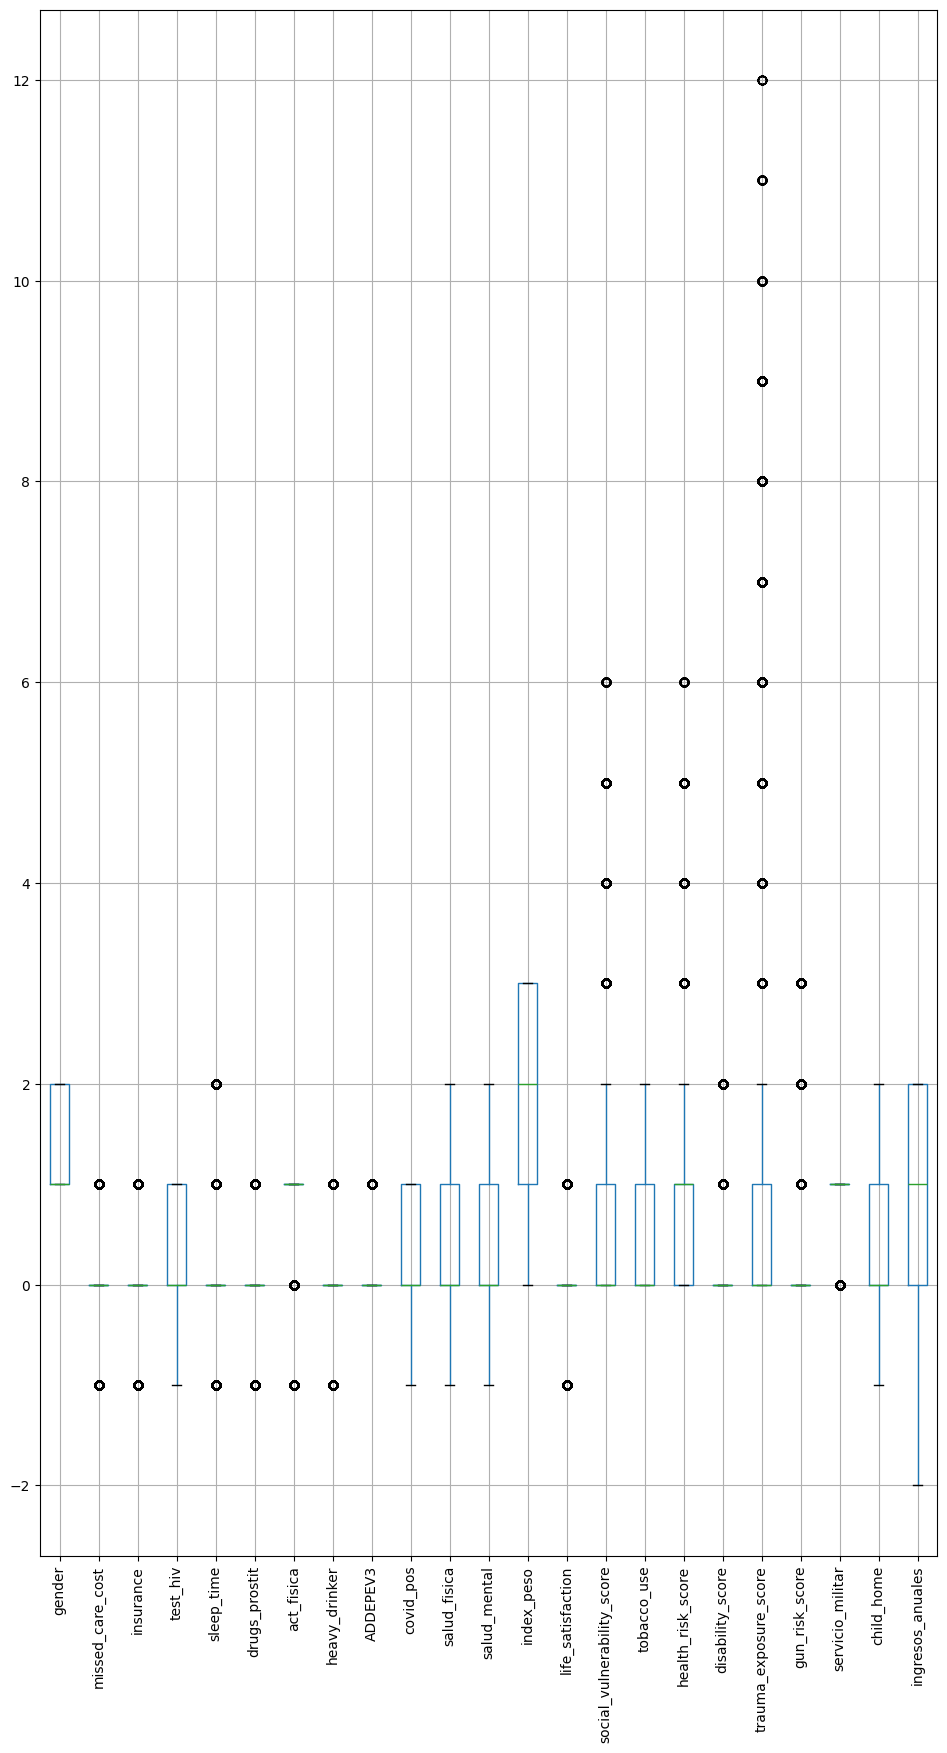

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
df.select_dtypes(include='number').boxplot(figsize=(10, 16))
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

In [5]:
df['trauma_exposure_score'].value_counts()

trauma_exposure_score
0.0     127368
1.0      35991
2.0      10783
3.0       1441
4.0       1017
5.0        716
6.0        585
7.0        381
8.0        248
9.0        186
10.0        96
11.0        57
12.0        18
Name: count, dtype: int64

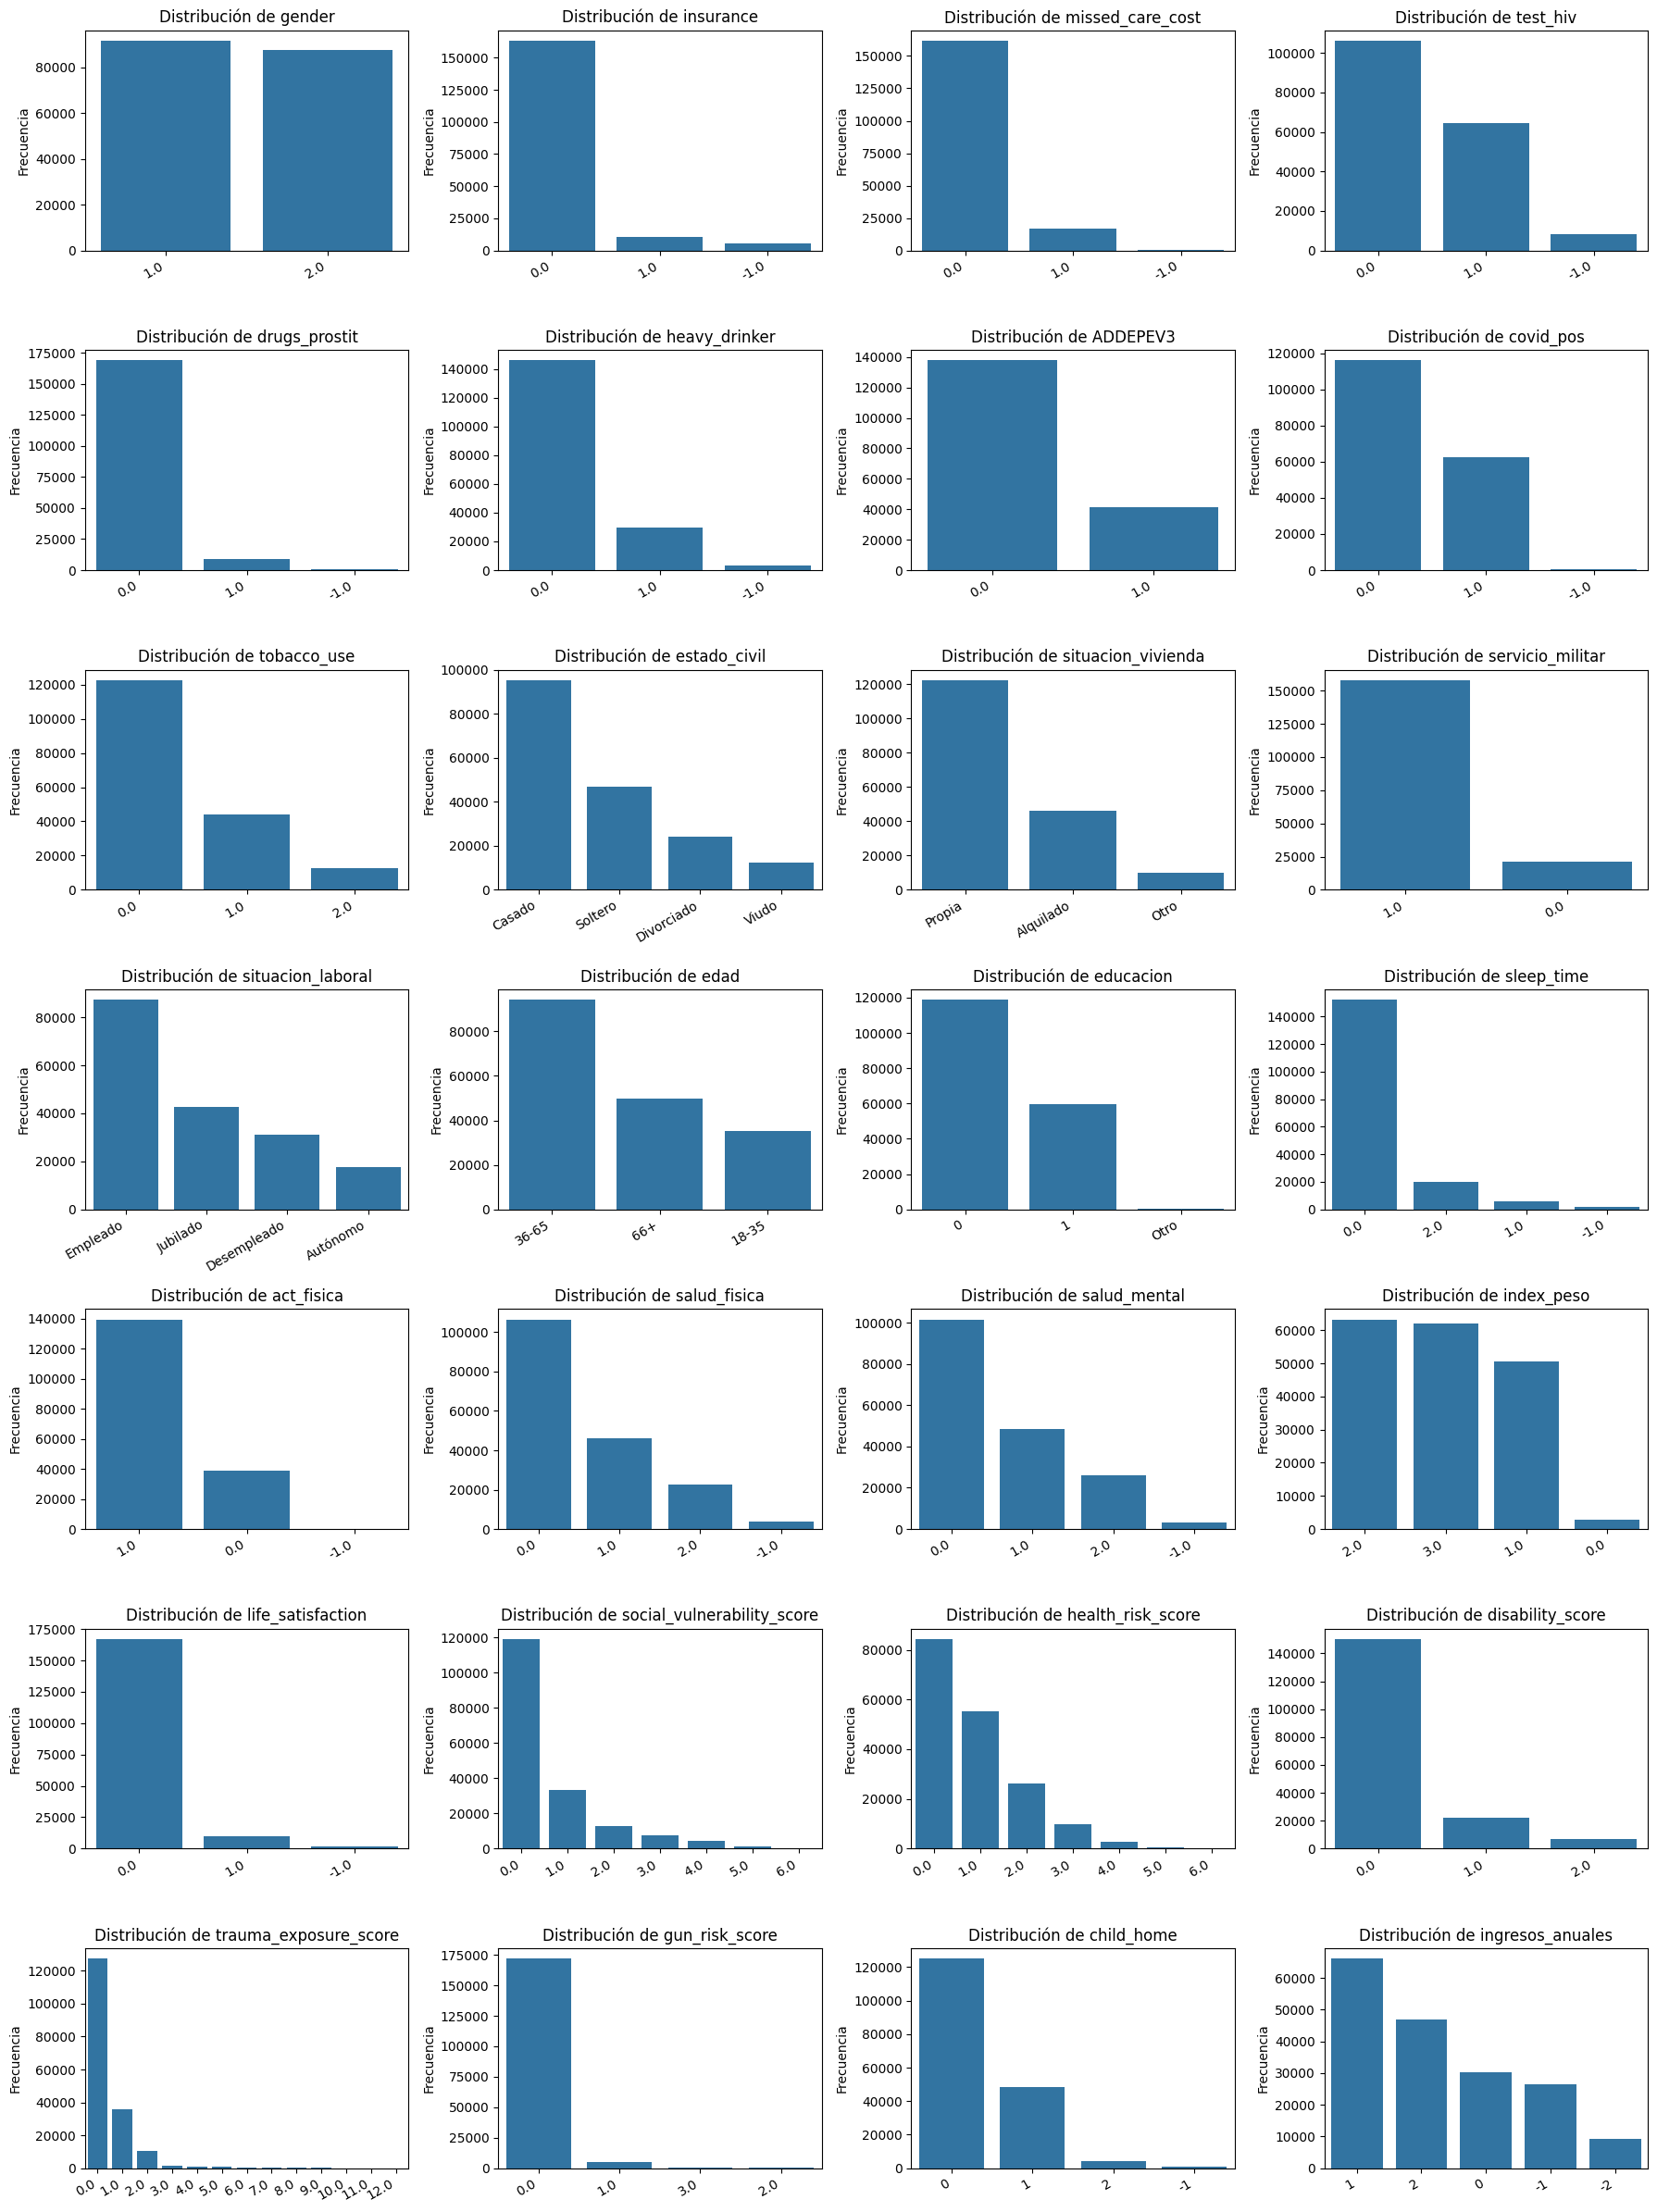

In [6]:
# Variables categoricas 
categoricas_columns = [
    'gender', 'insurance', 'missed_care_cost', 'test_hiv', 'drugs_prostit', 'heavy_drinker',
    'ADDEPEV3', 'covid_pos', 'tobacco_use', 'estado_civil',
    'situacion_vivienda', 'servicio_militar', 'situacion_laboral',
    'edad', 'educacion' , 'sleep_time', 'act_fisica', 'salud_fisica',
    'salud_mental', 'index_peso', 'life_satisfaction',
    'social_vulnerability_score', 'health_risk_score', 'disability_score',
    'trauma_exposure_score', 'gun_risk_score', 'child_home', 'ingresos_anuales'
]

filas = 7
columnas = 4
plt.figure(figsize=(18, 24))

# Recorremos y graficamos cada variable en una subgráfica
for i, col in enumerate(categoricas_columns):
    plt.subplot(filas, columnas, i + 1)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribución de {col}')
    plt.xlabel('')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=30, ha='right')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
df = pd.read_csv("/workspaces/Final_Project_DataScient/data/interim/data_limpia.zip")


: 

In [ ]:
cols = ['ACEDEPRS', 'LSATISFY', 'EMTSUPR',
 'SDHISOLT', 'ACEDRINK', 'ACEDRUGS', 'ACEPRISN', 
 'ACEDIVRC', 'ACEHURT1', 'ACESWEAR', 'ACETOUCH', 
 'ACETTHEM', 'ACEHVSEX', 'ADDEPEV3'] 
cols_existentes = [col for col in cols if col in df.columns]
df_corr = df[cols_existentes]

plt.figure(figsize=(16, 12)) 
sns.heatmap(df_corr, annot=True, fmt='.2f', cmap='viridis', square=True, linewidths=.5) 
plt.title('Matriz de Correlación entre Variables Numéricas') 
plt.xticks(rotation=45, ha='right') 
plt.tight_layout() 
plt.show()

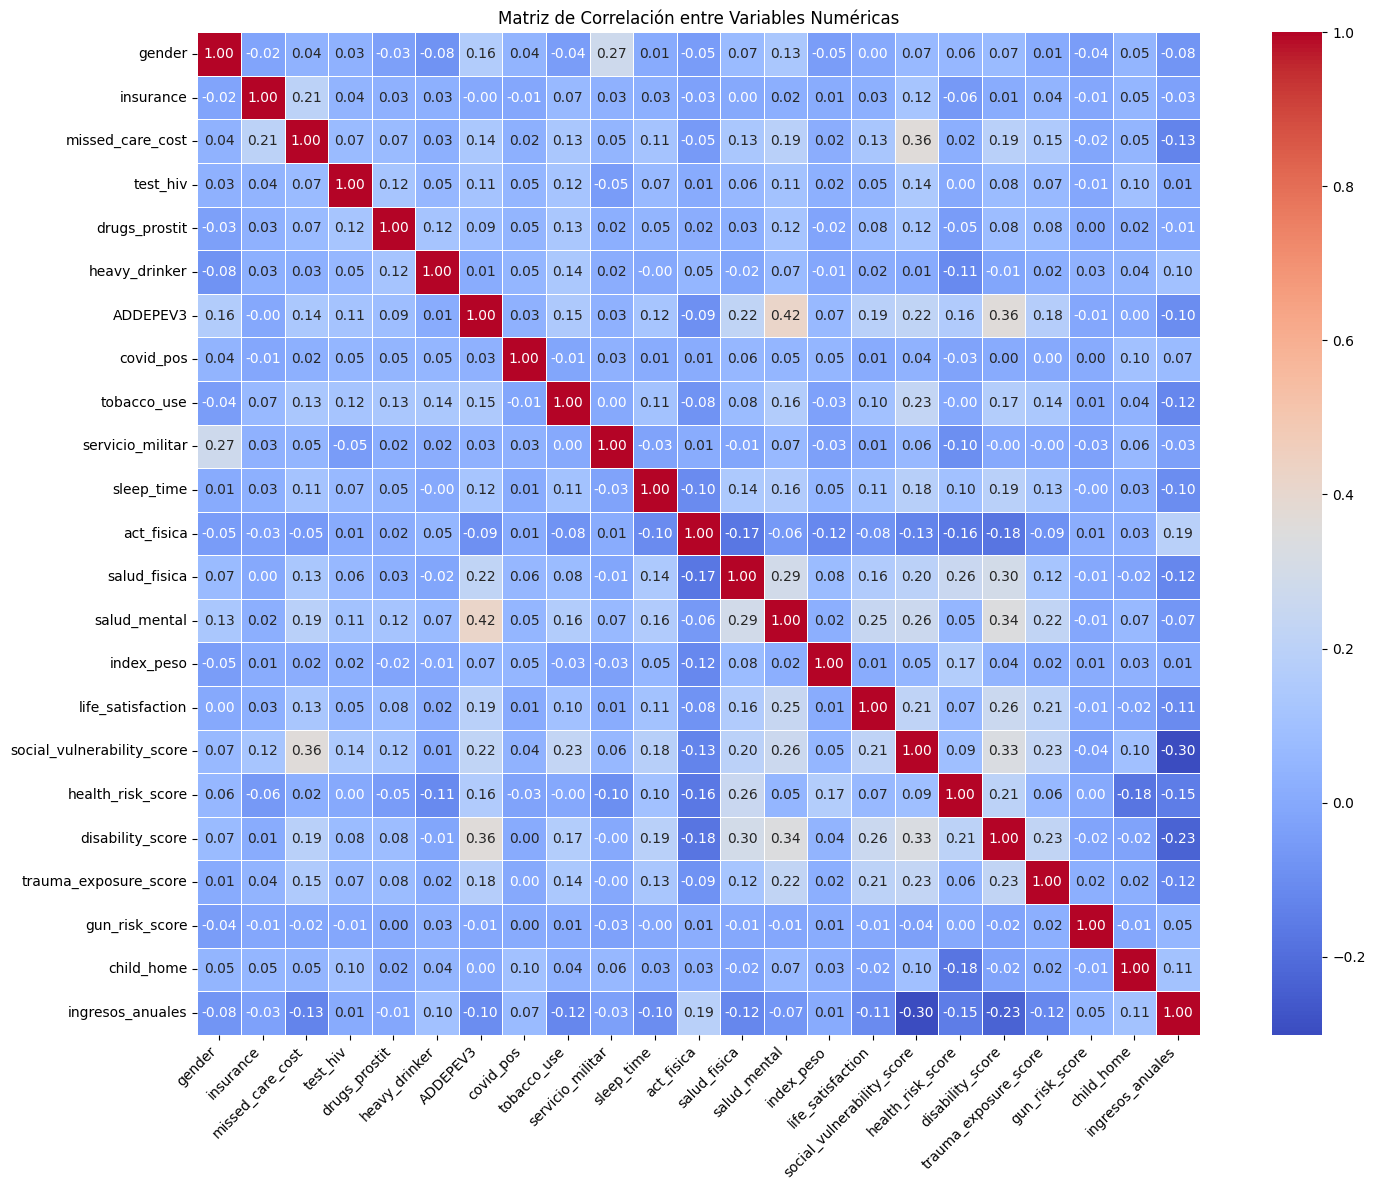

In [ ]:
cols = [
    'gender', 'insurance', 'missed_care_cost', 'test_hiv', 'drugs_prostit', 'heavy_drinker',
    'ADDEPEV3', 'covid_pos', 'tobacco_use', 'servicio_militar', 'sleep_time', 'act_fisica',
    'salud_fisica', 'salud_mental', 'index_peso', 'life_satisfaction',
    'social_vulnerability_score', 'health_risk_score', 'disability_score',
    'trauma_exposure_score', 'gun_risk_score', 'child_home', 'ingresos_anuales'
]
df_corr = df[cols]
correlation_matrix = df_corr.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=.5)
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()


ValueError: could not convert string to float: 'Casado'

<Figure size 1200x800 with 0 Axes>

: 

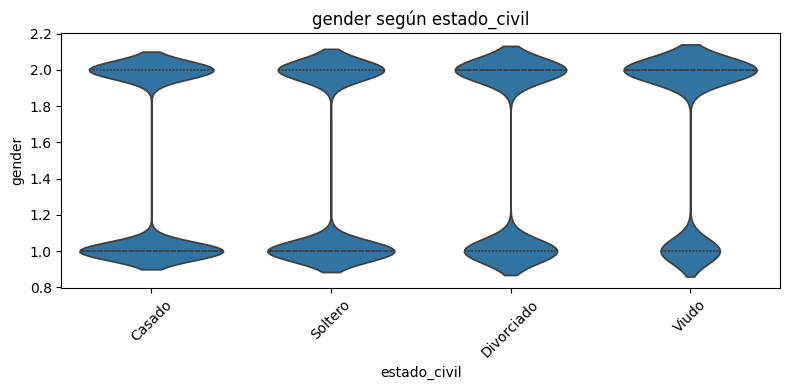

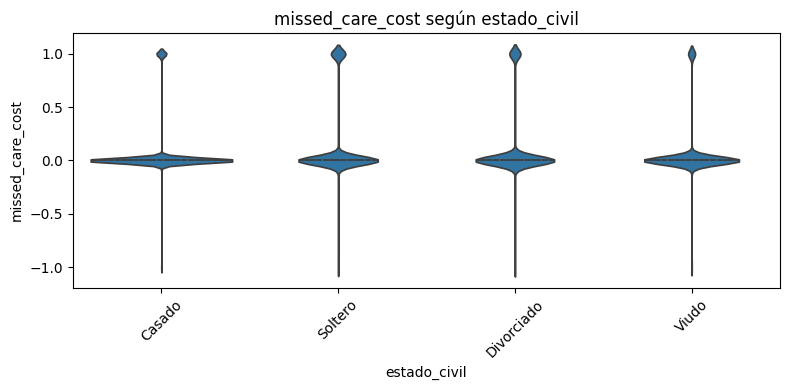

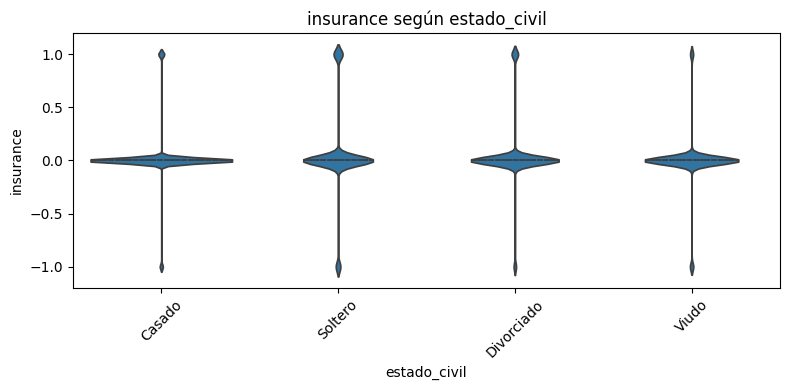

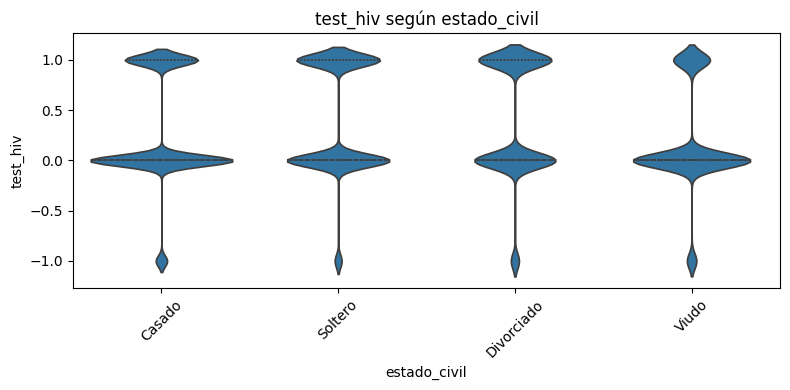

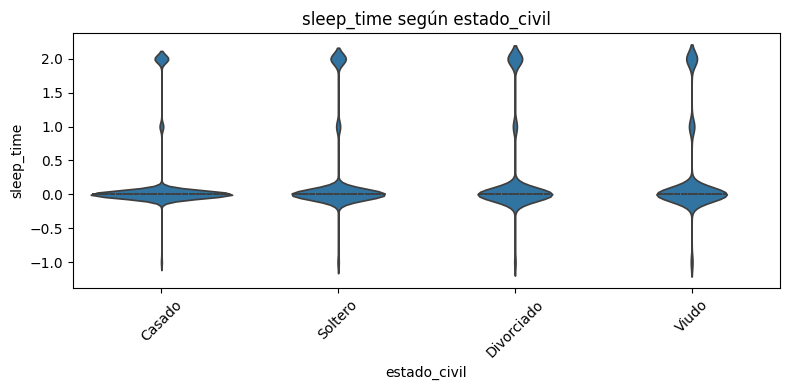

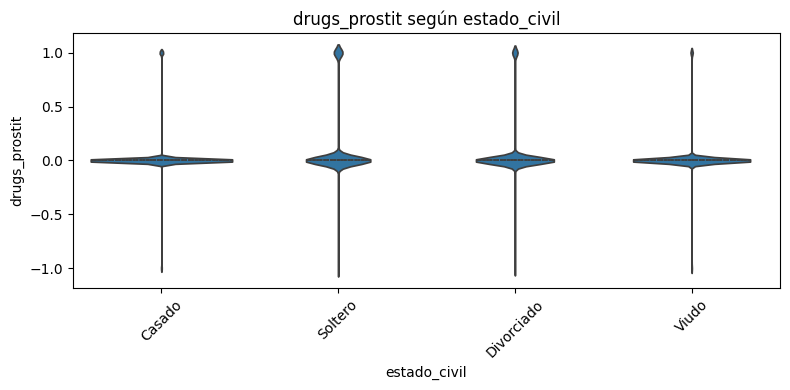

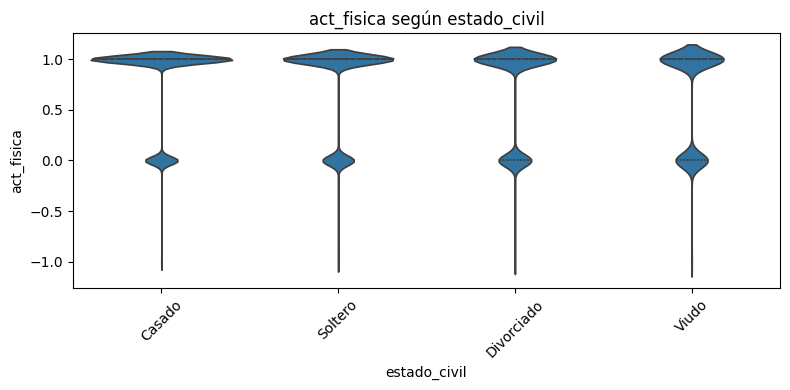

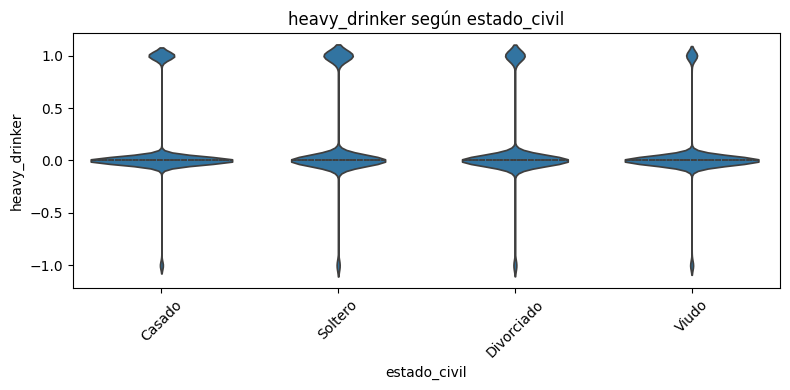

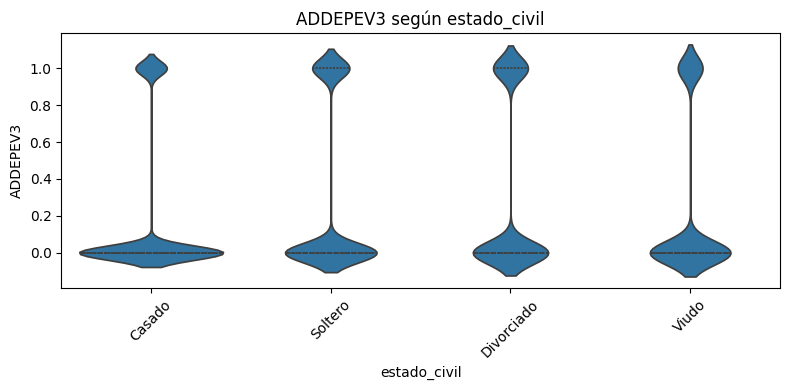

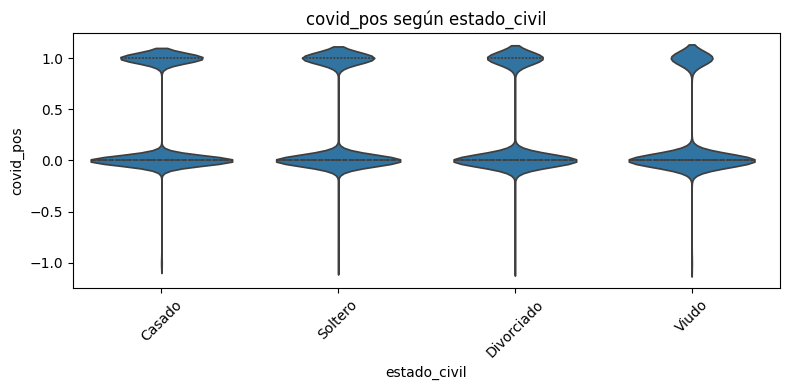

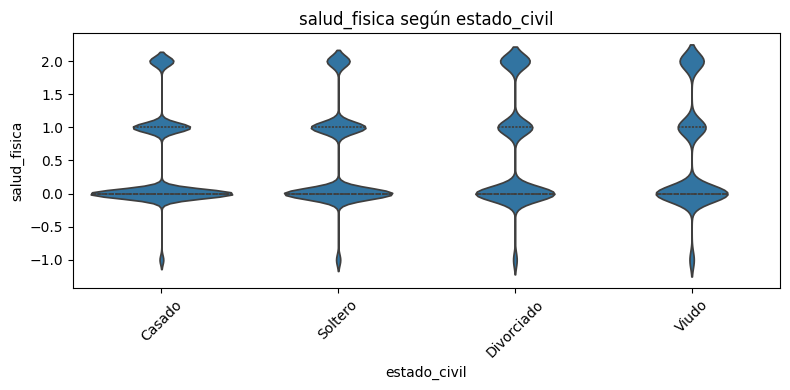

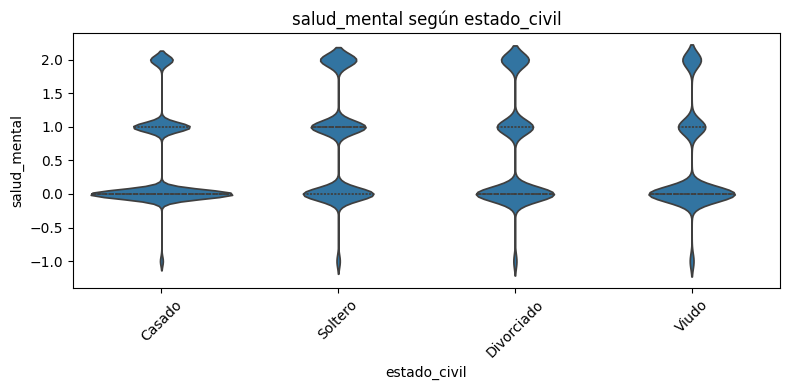

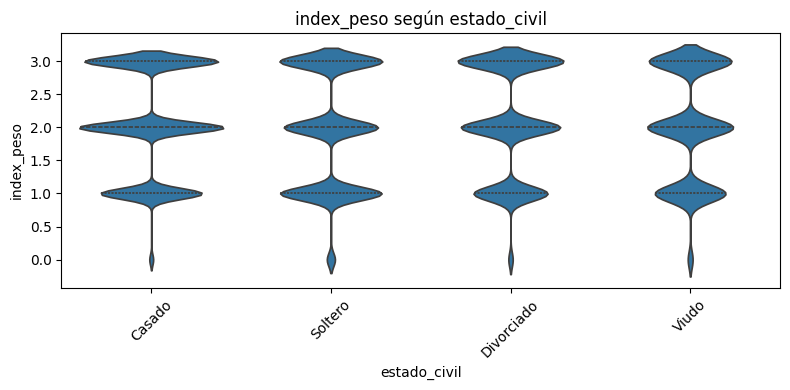

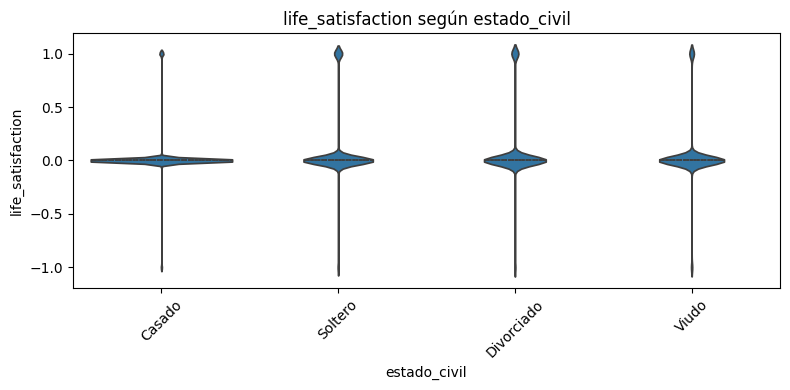

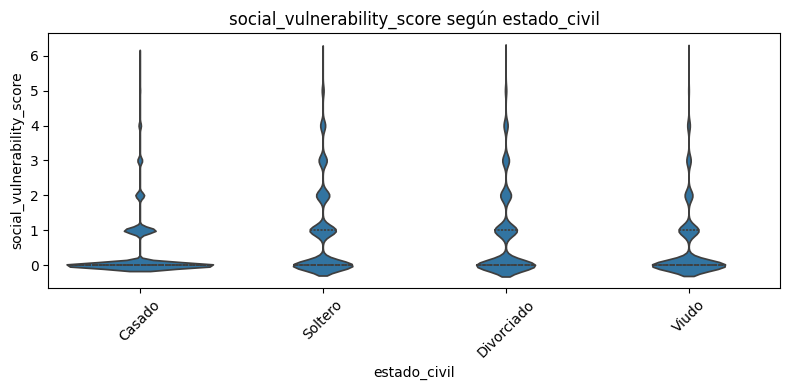

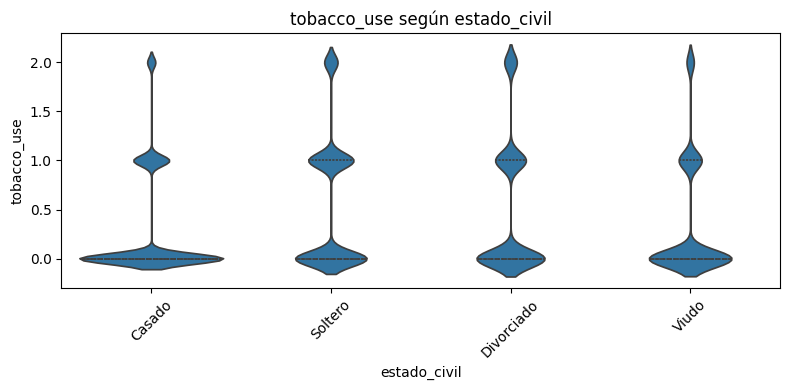

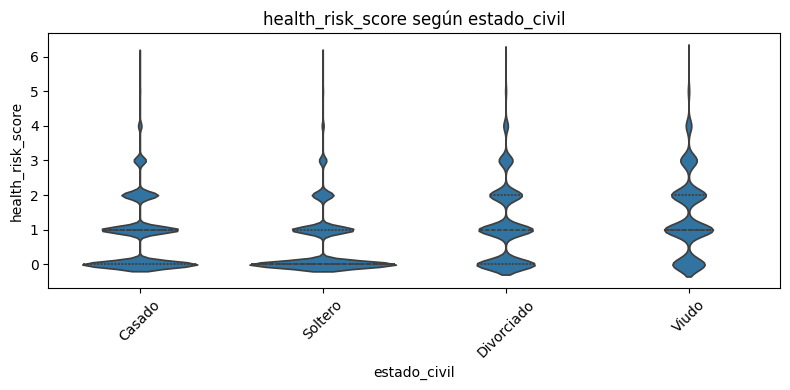

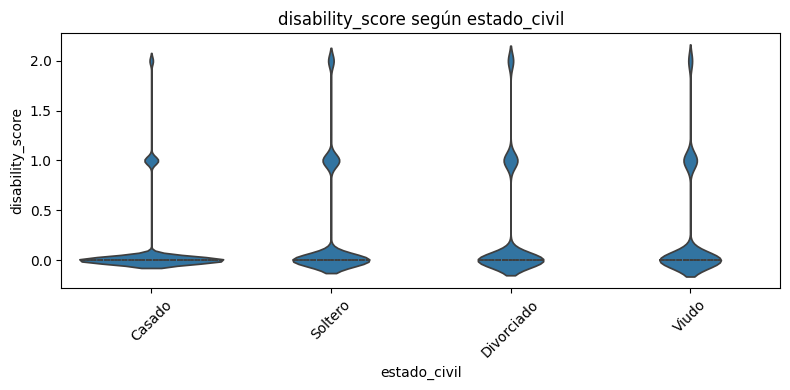

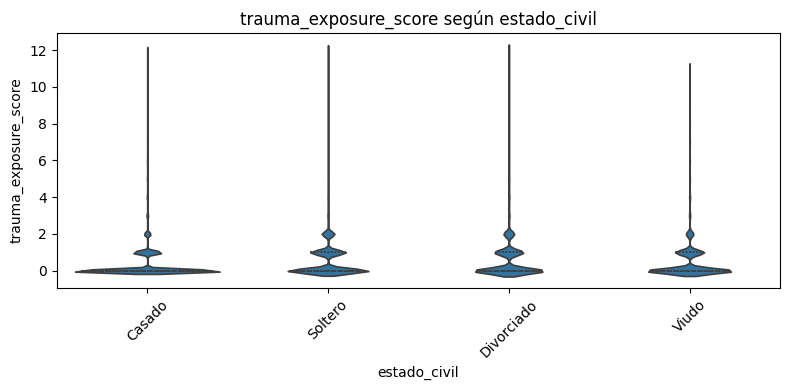

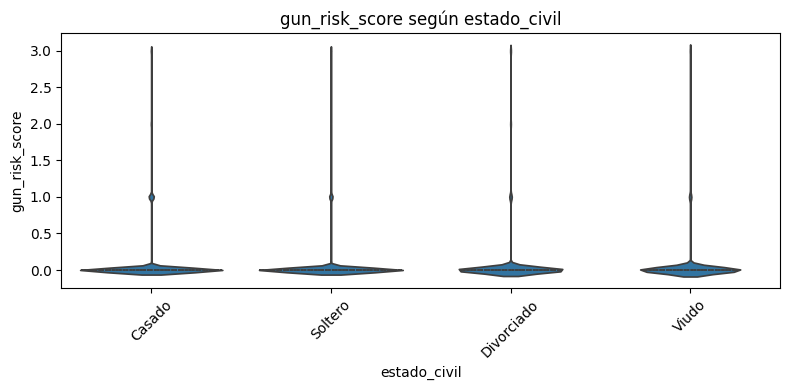

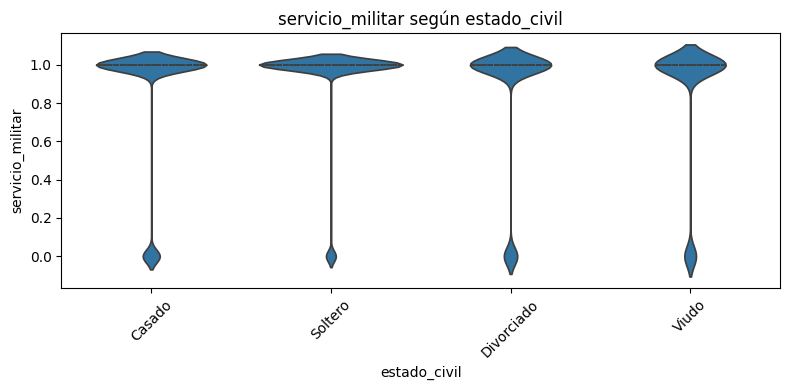

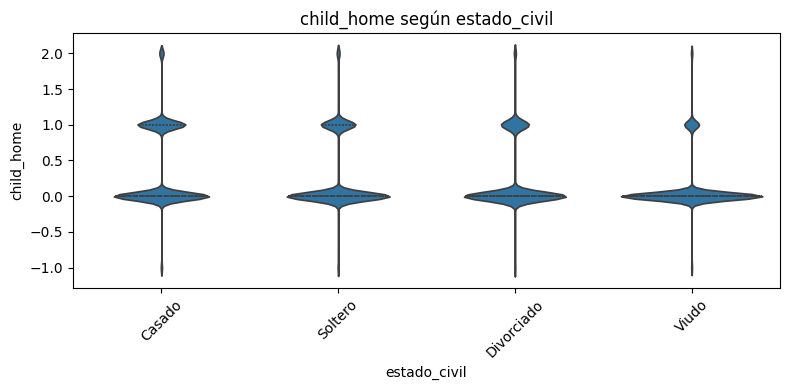

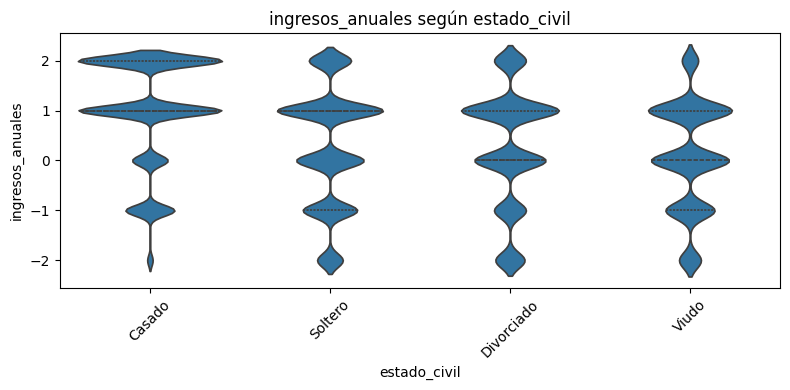

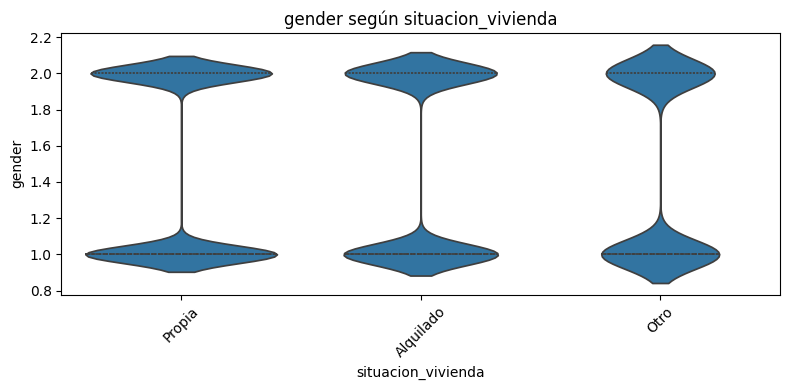

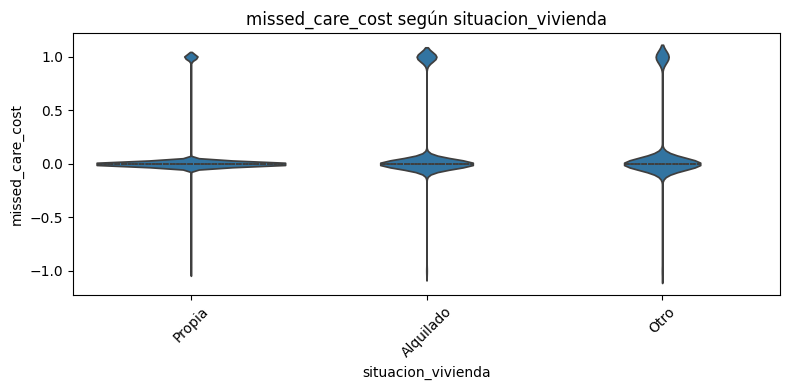

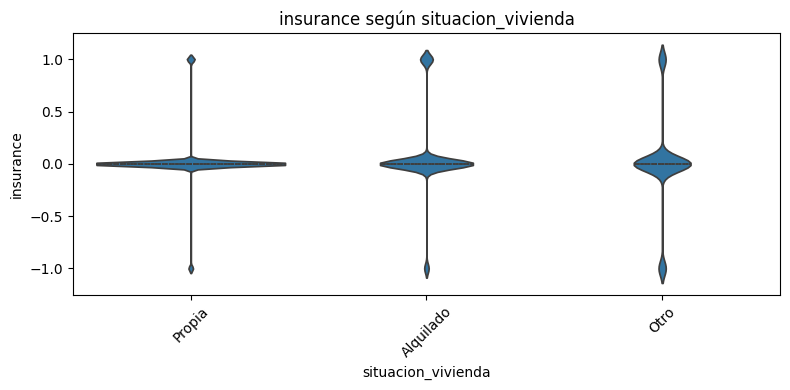

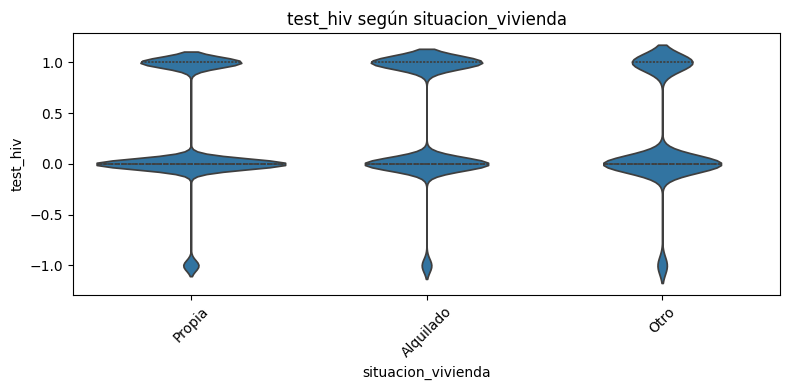

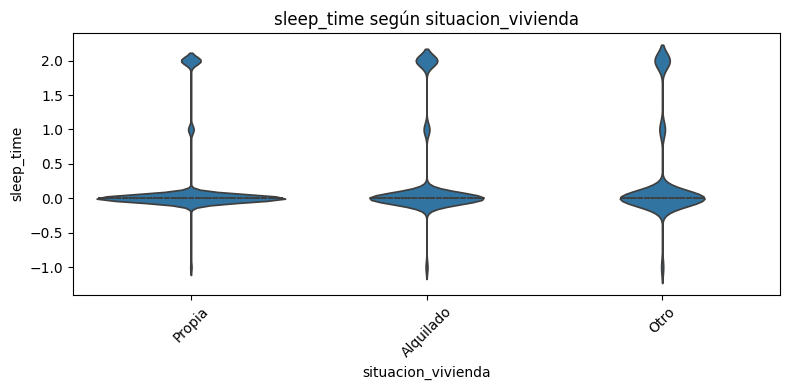

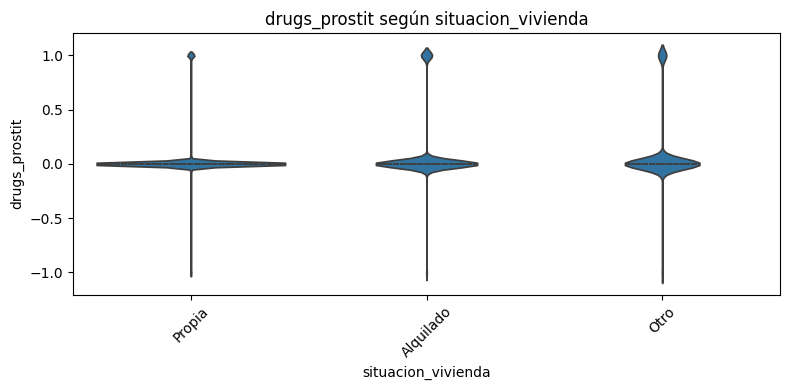

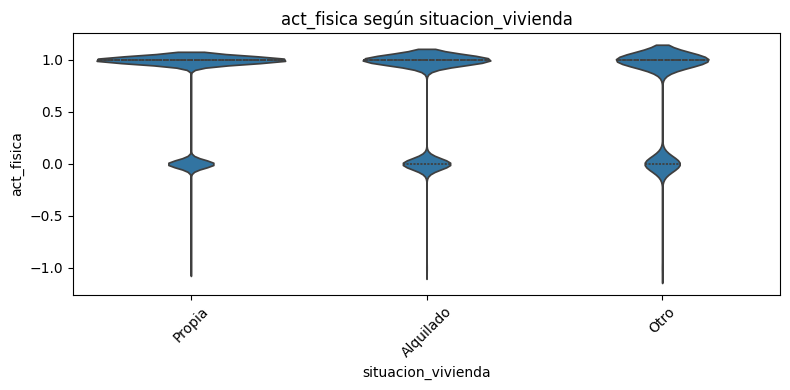

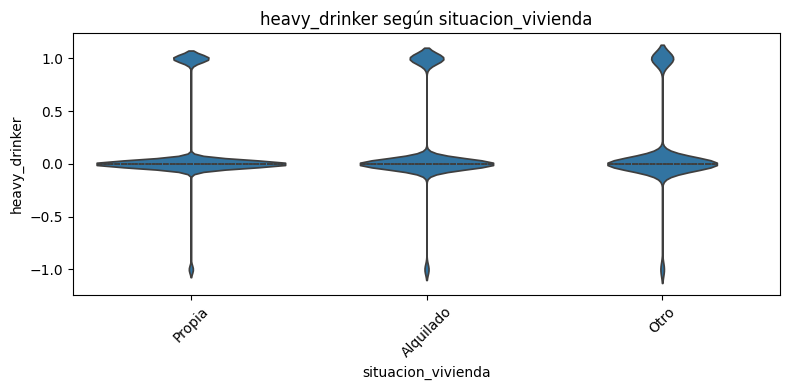

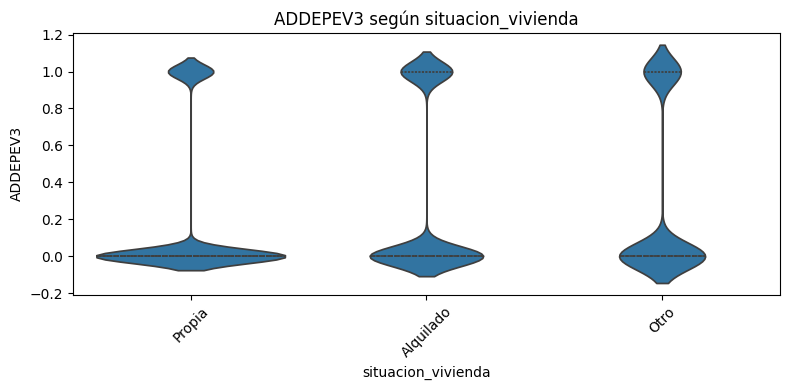

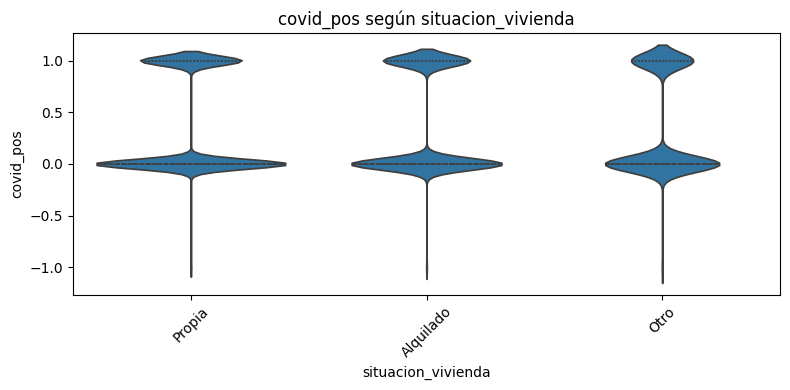

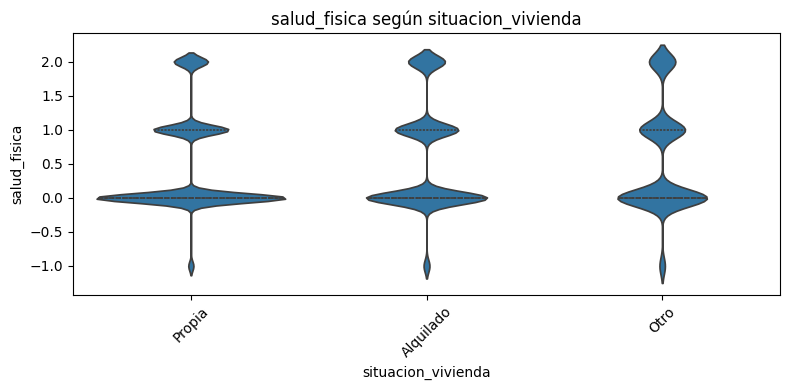

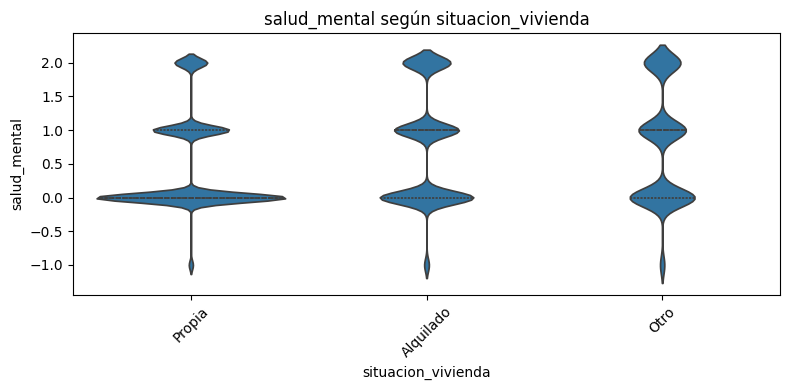

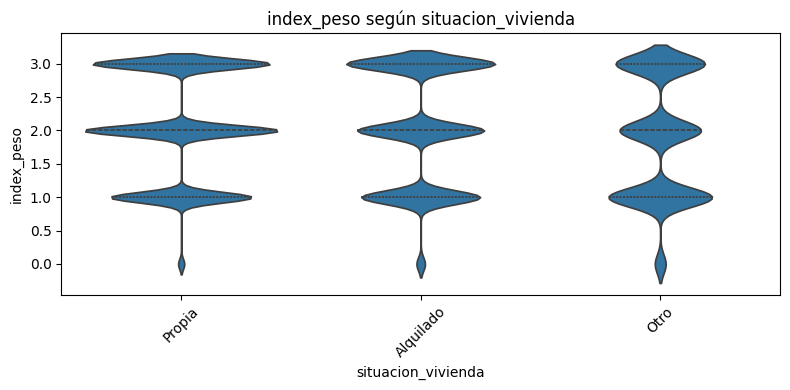

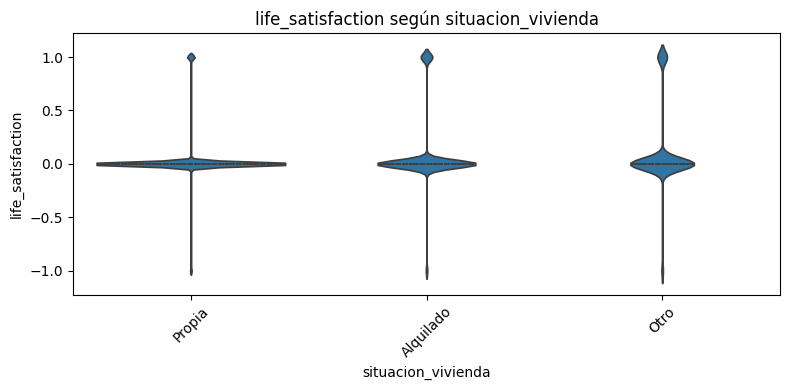

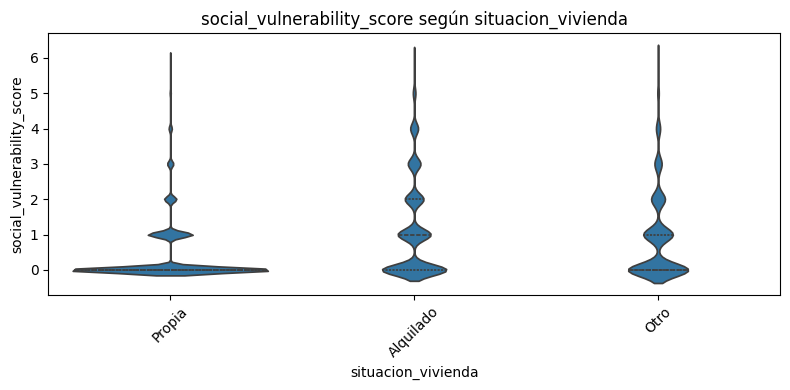

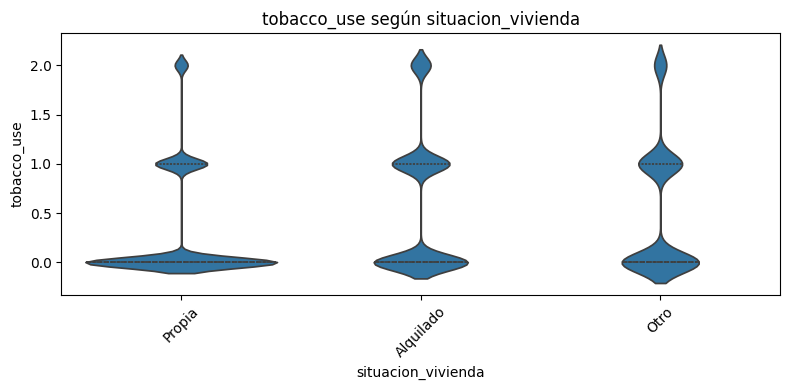

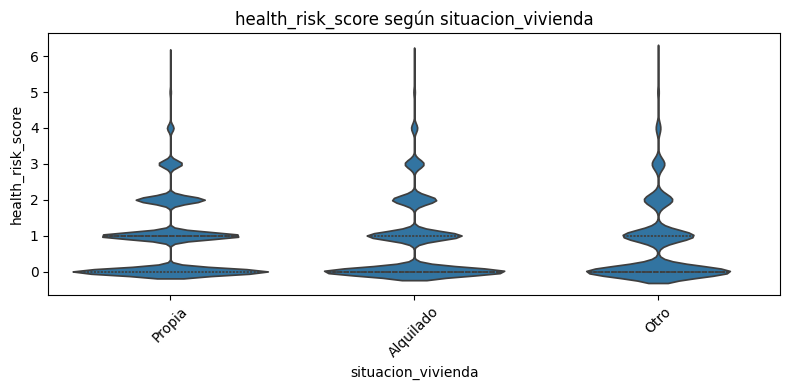

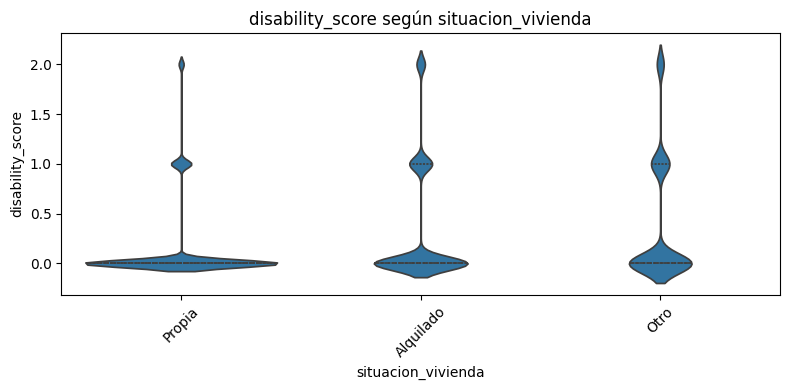

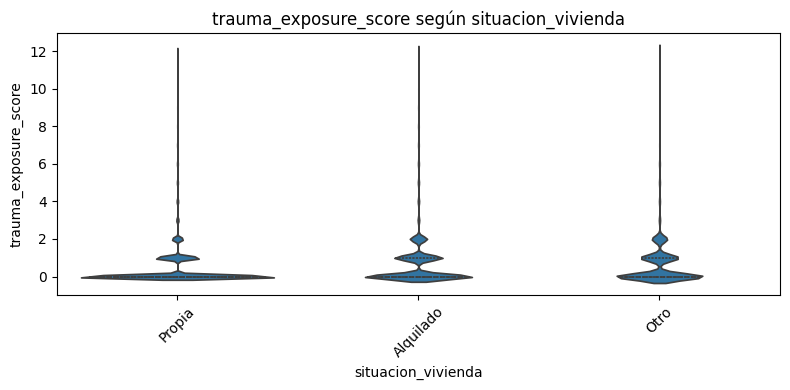

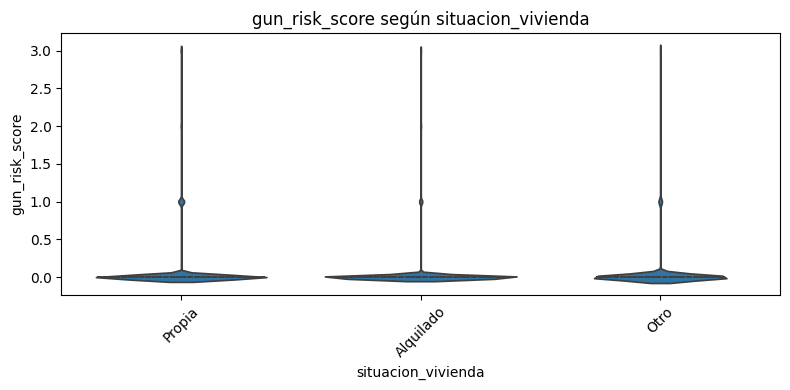

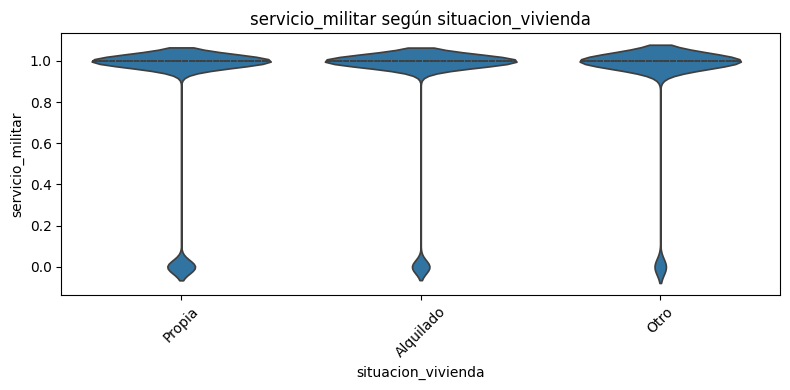

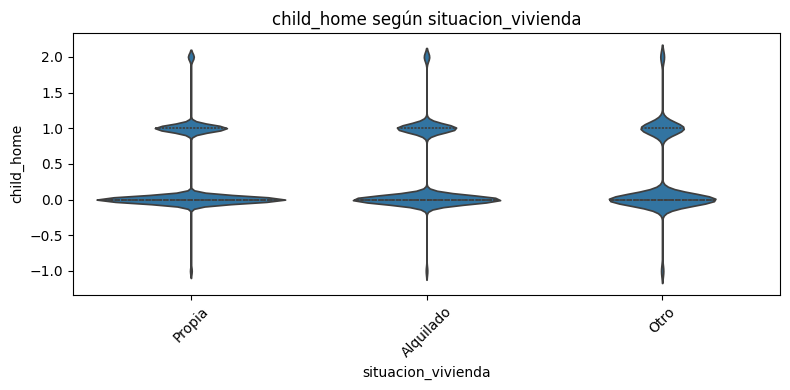

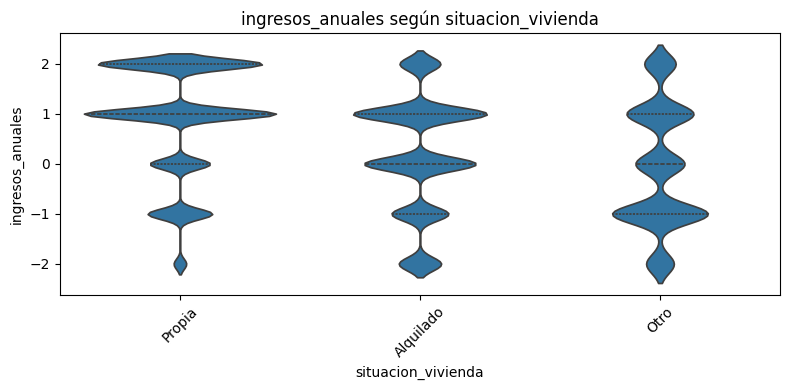

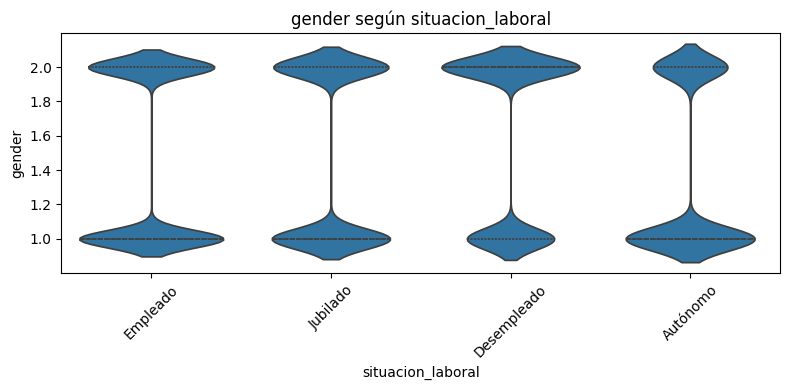

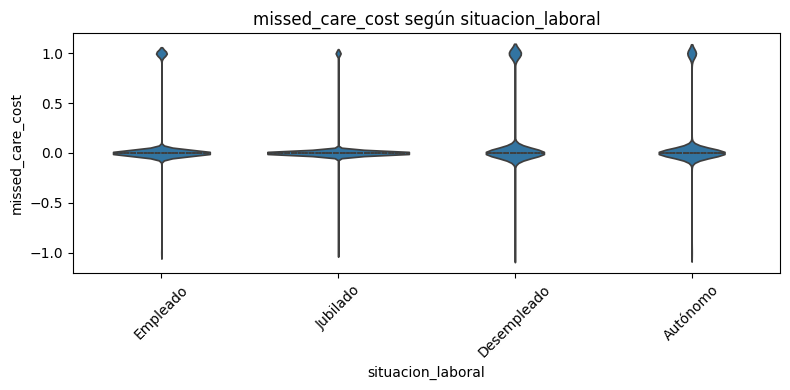

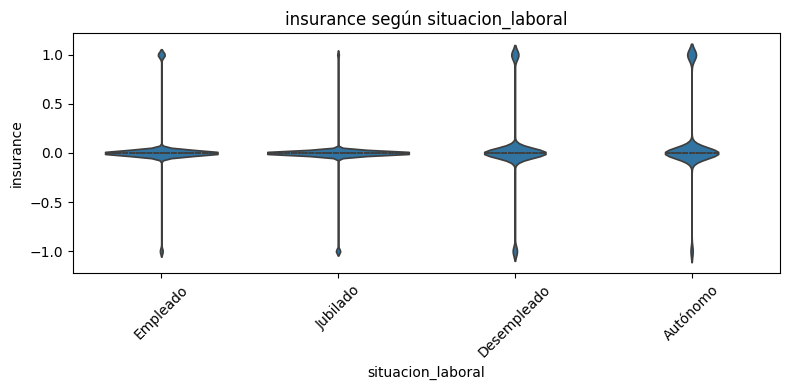

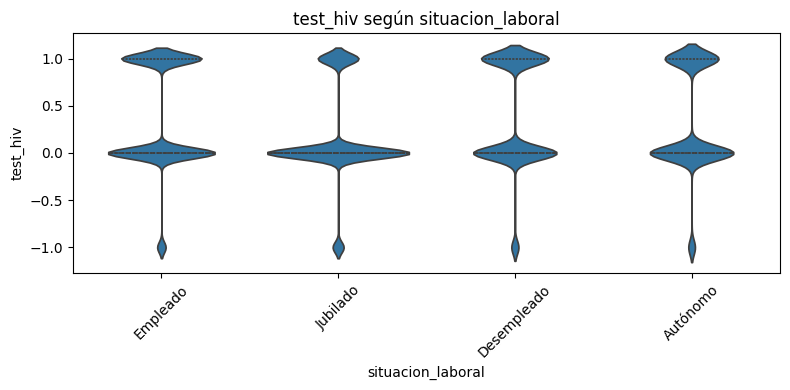

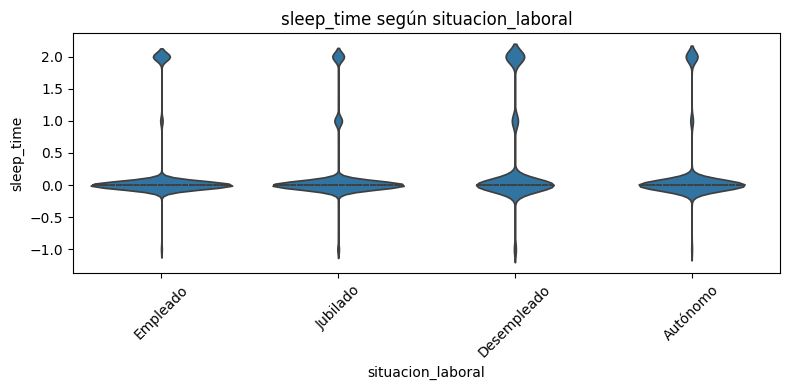

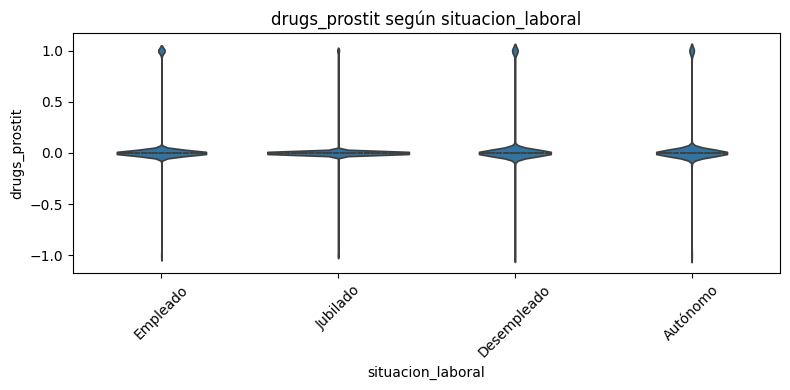

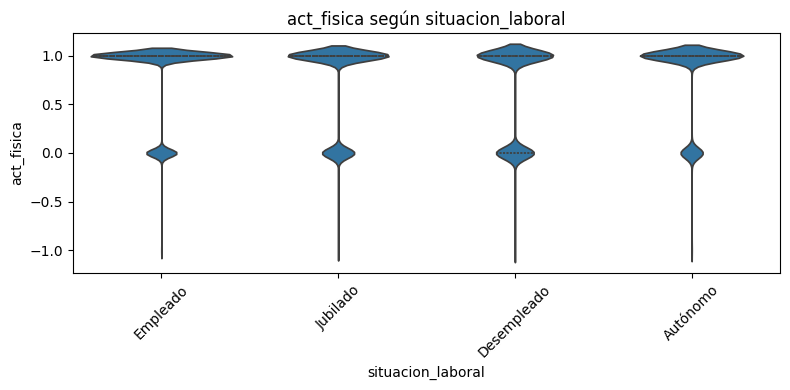

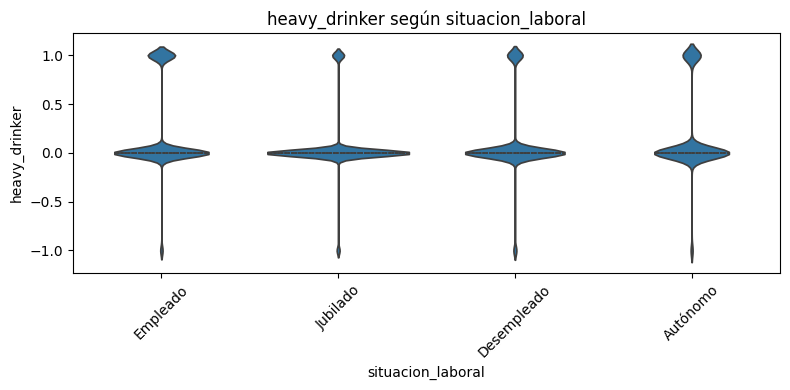

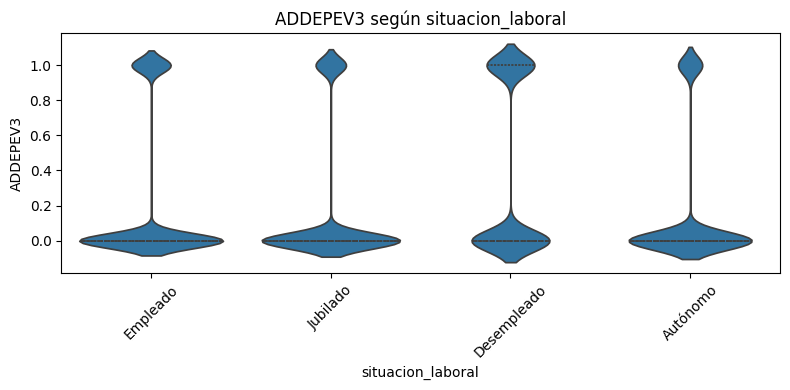

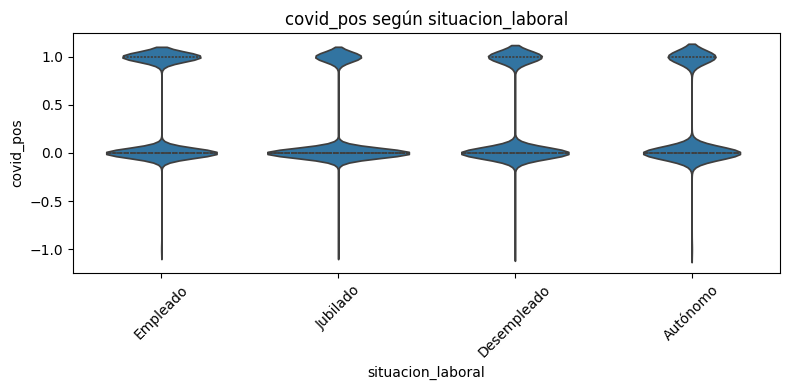

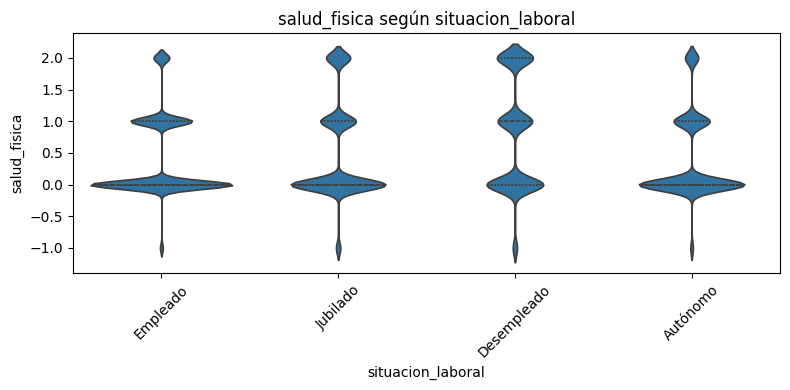

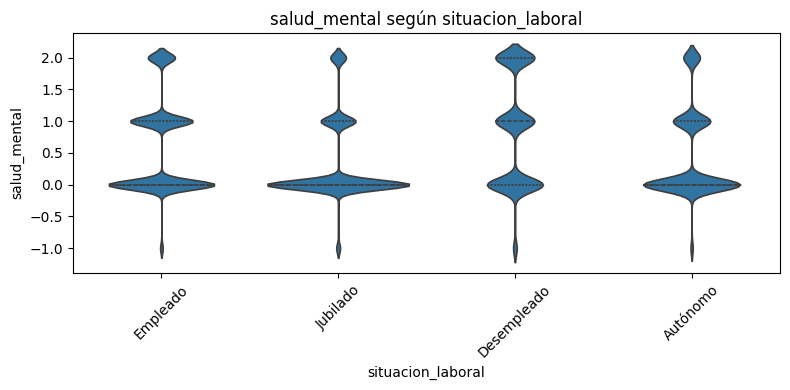

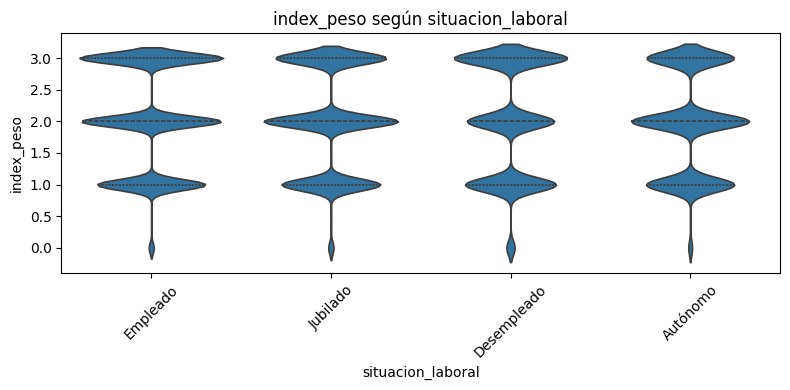

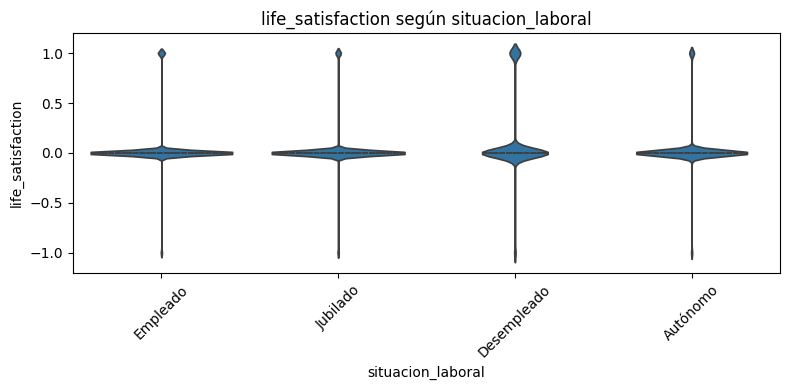

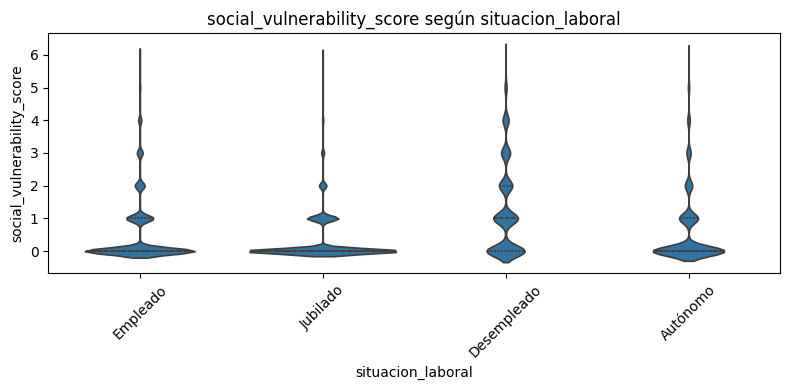

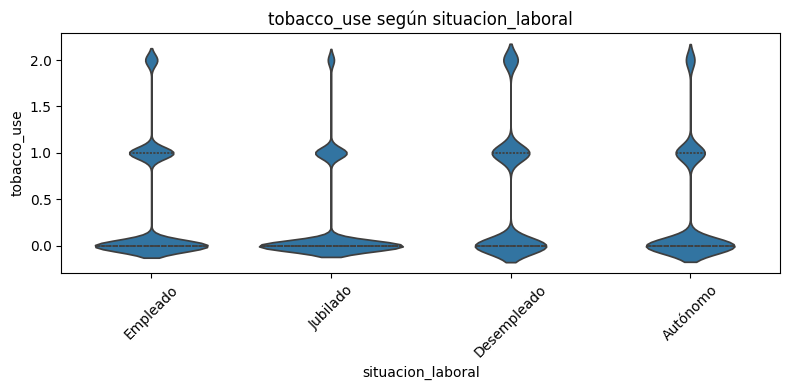

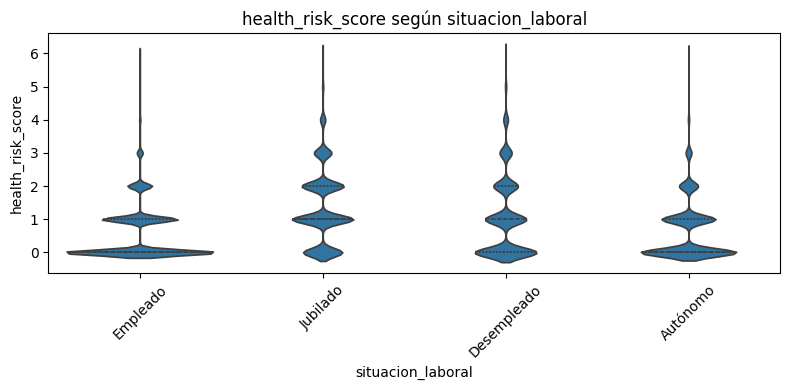

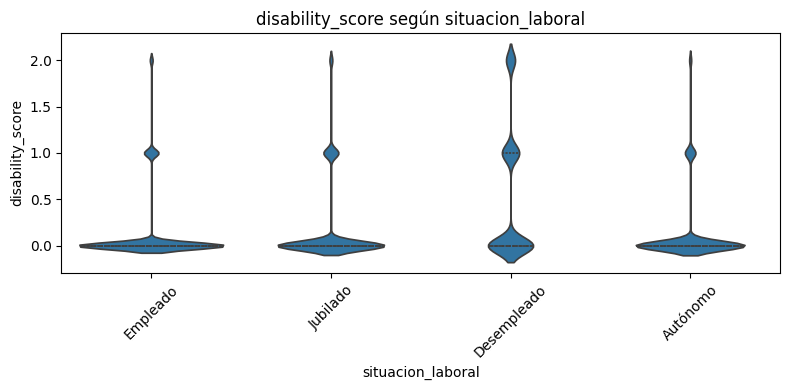

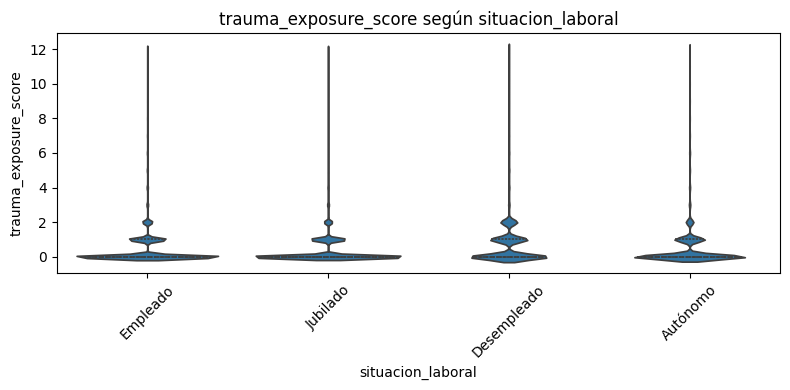

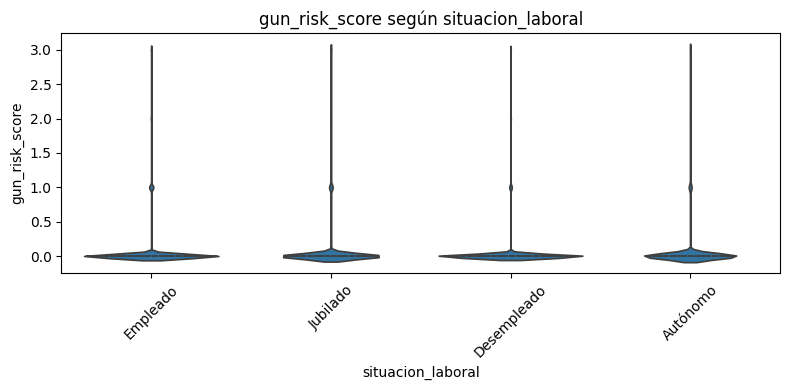

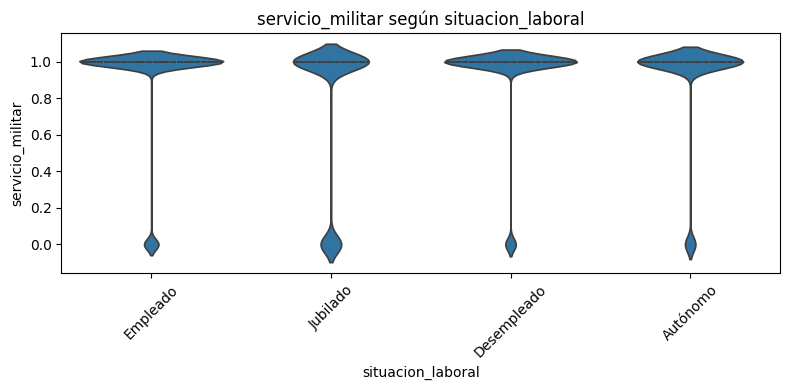

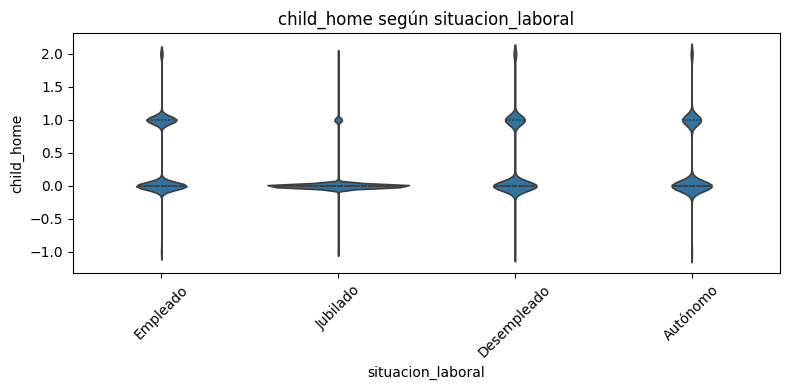

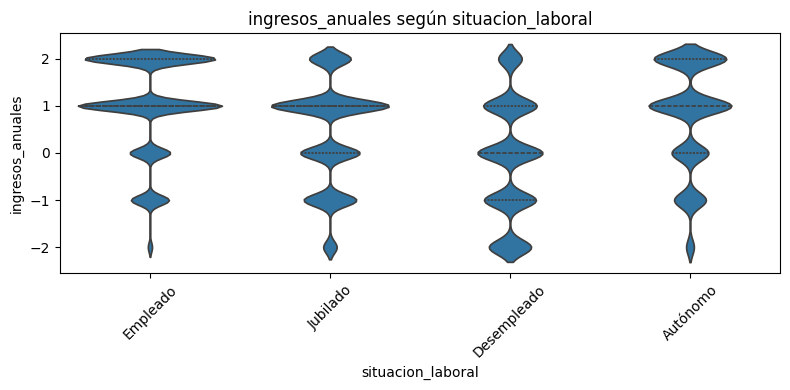

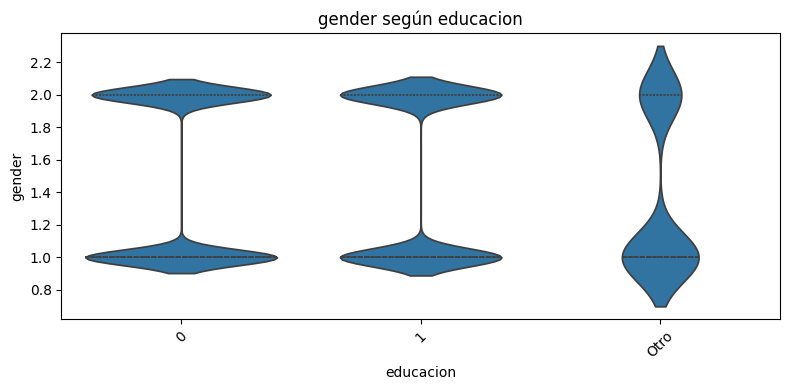

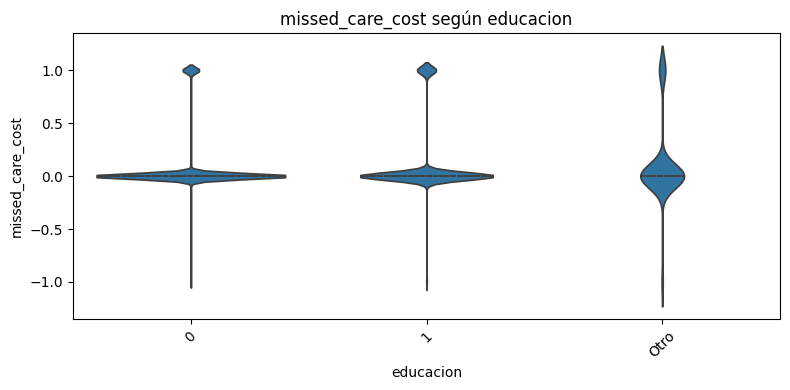

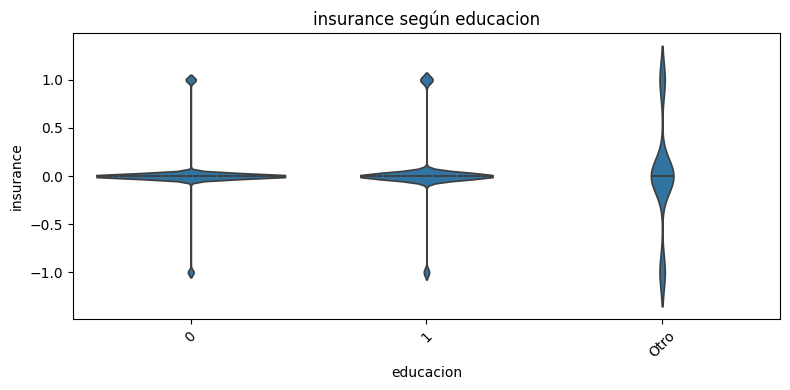

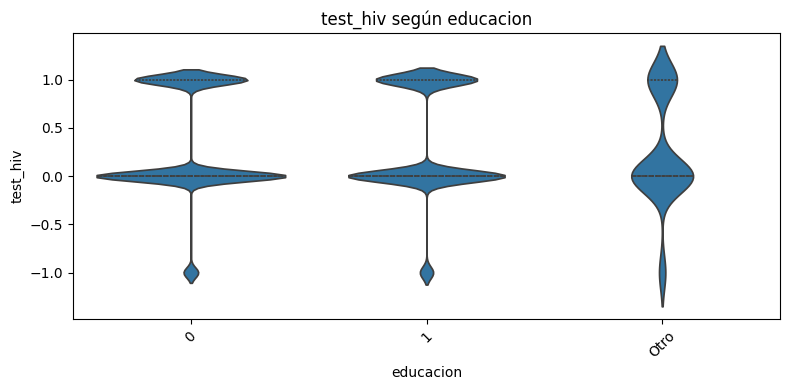

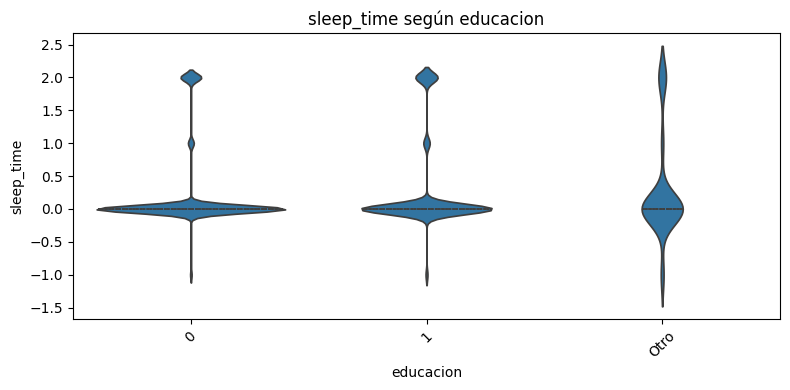

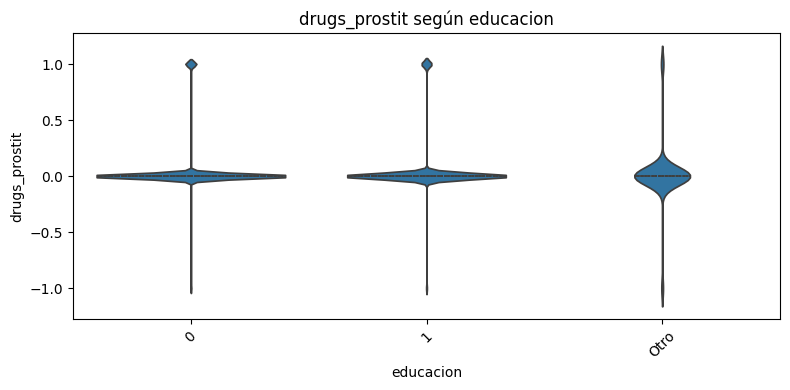

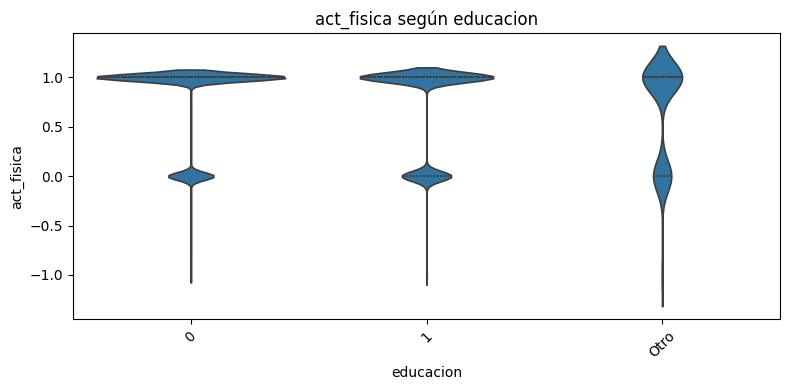

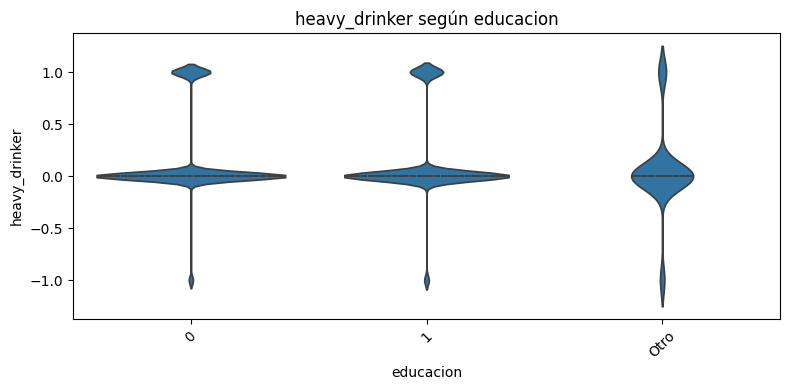

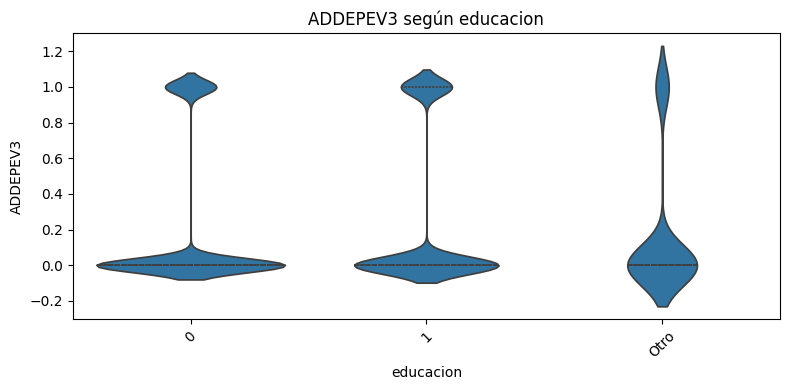

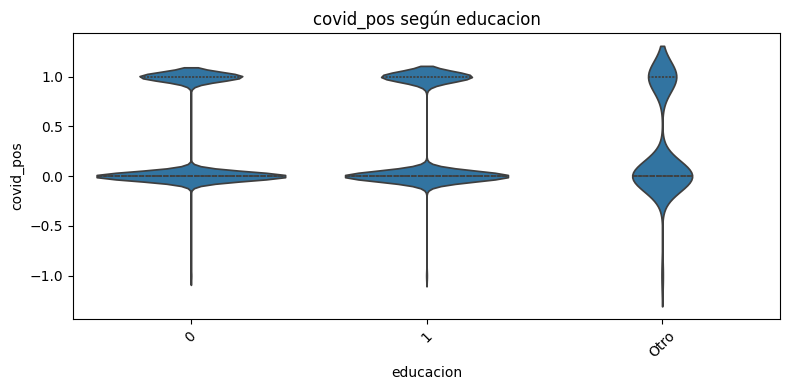

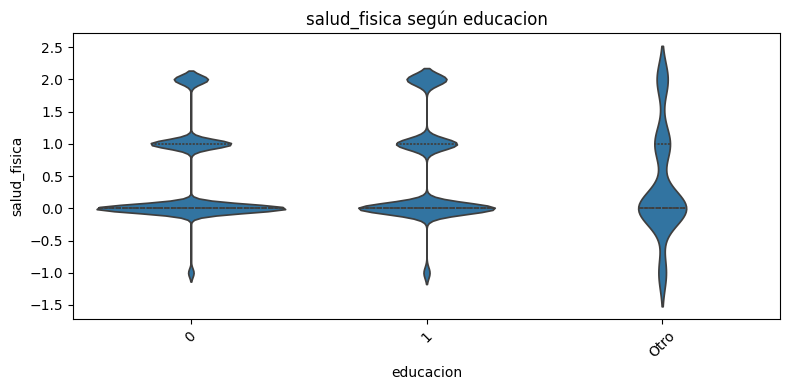

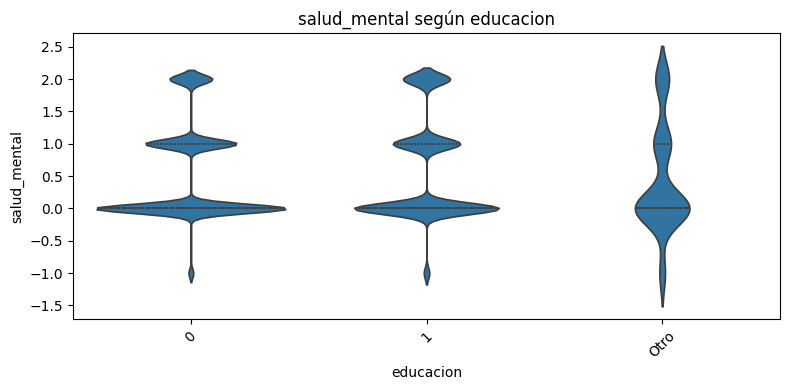

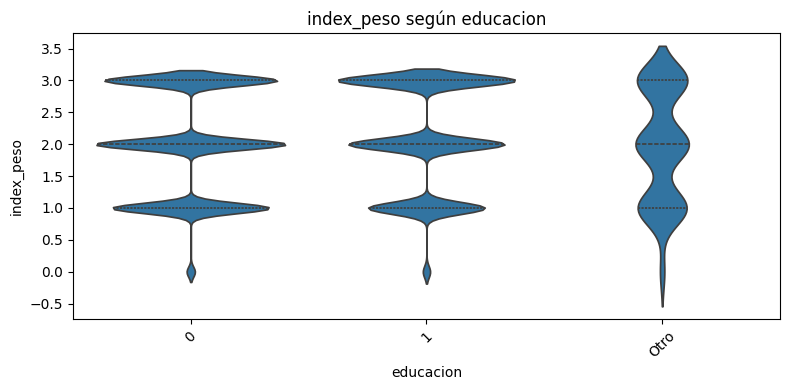

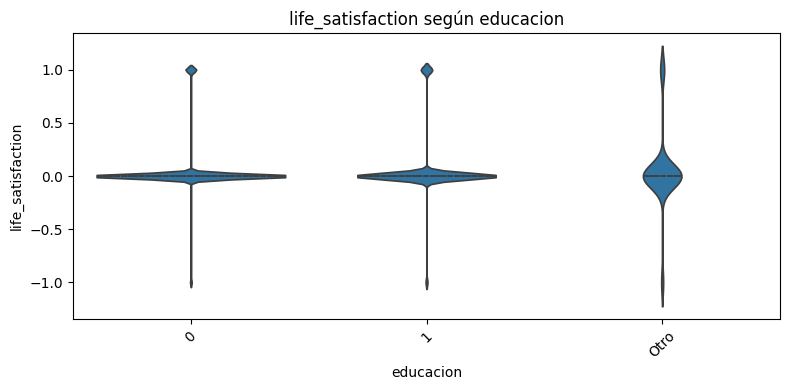

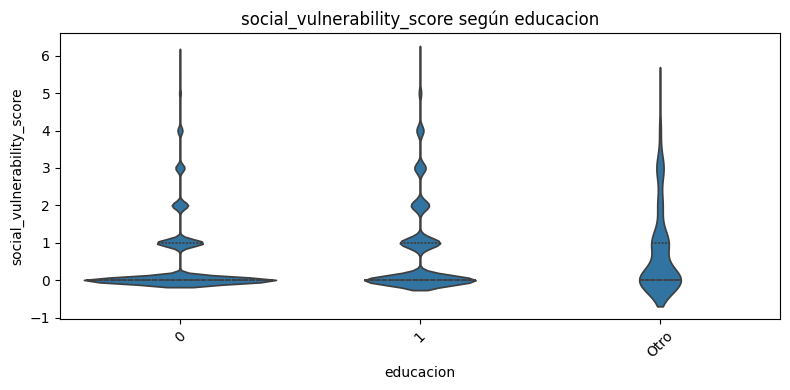

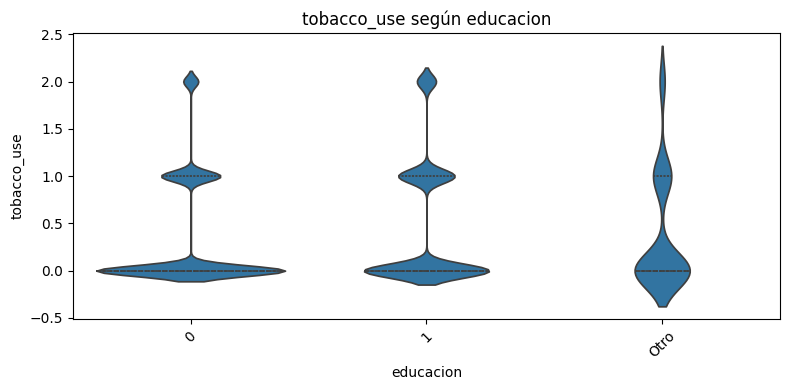

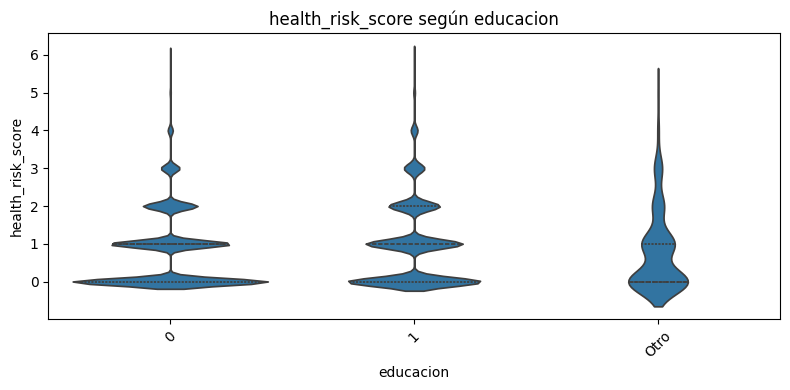

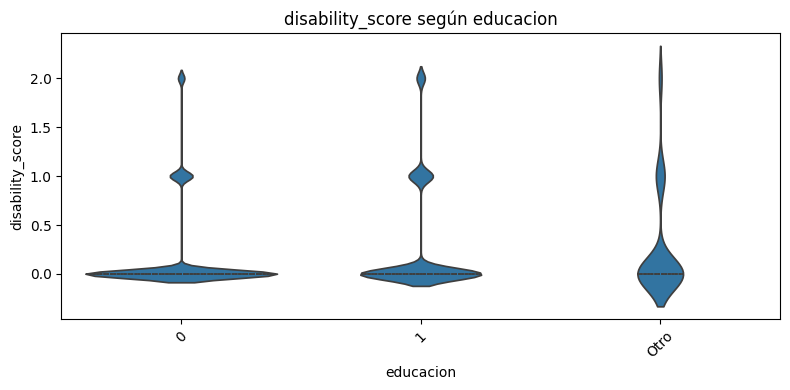

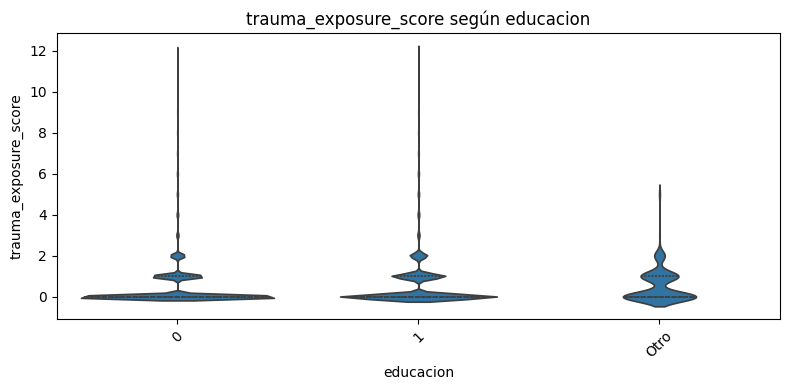

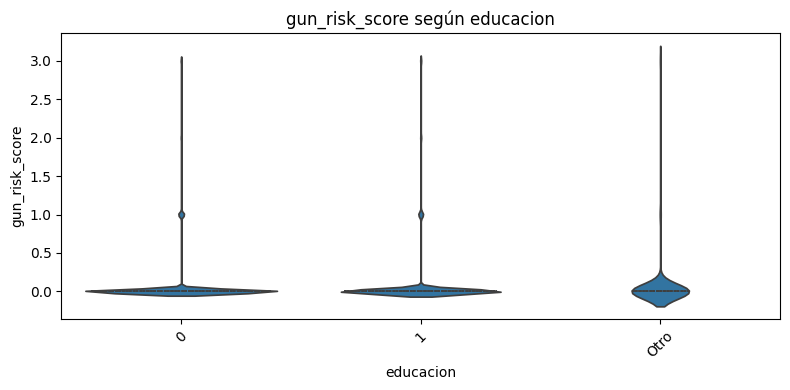

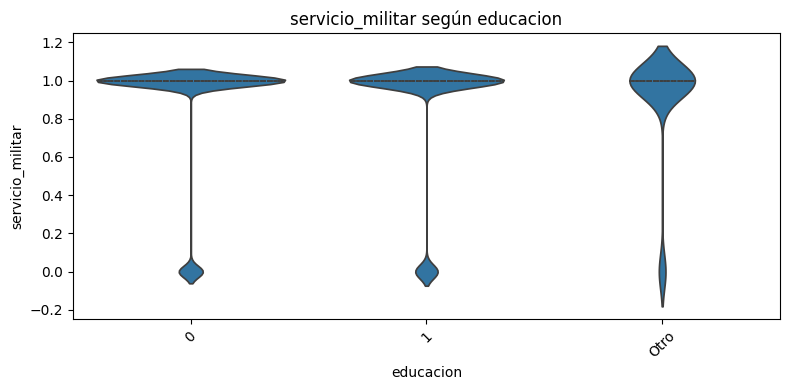

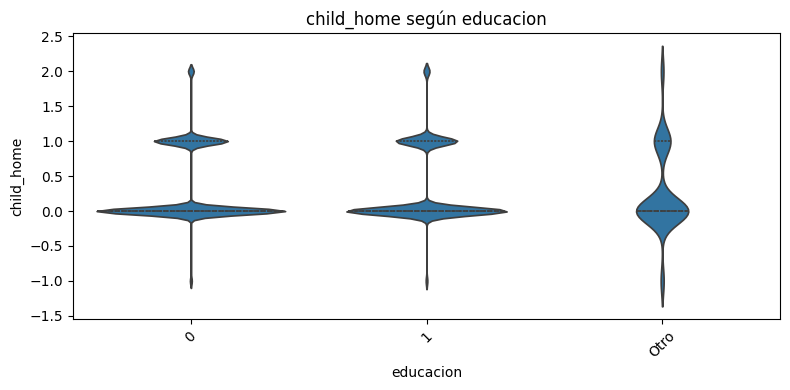

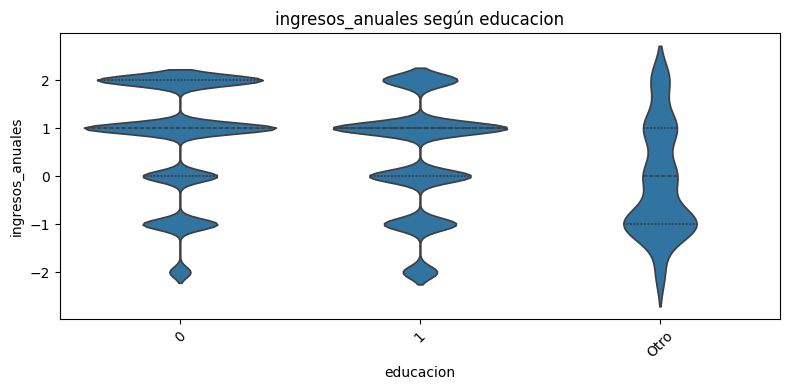

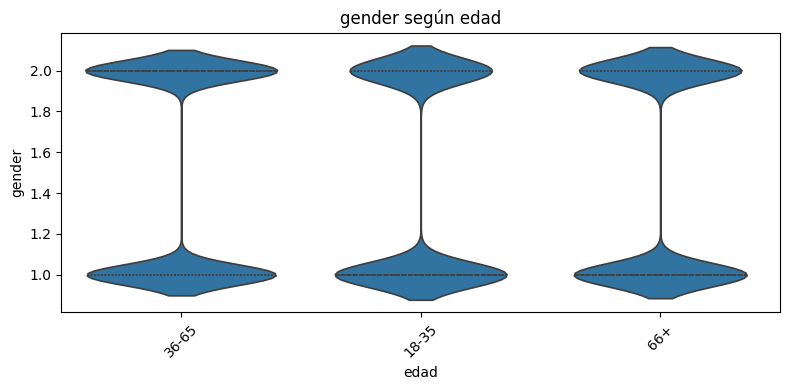

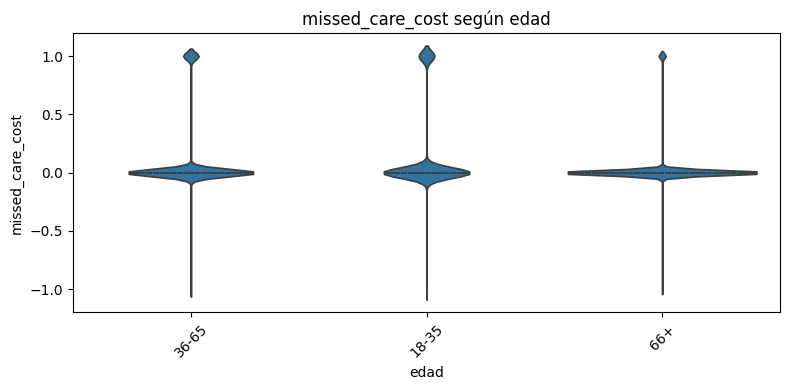

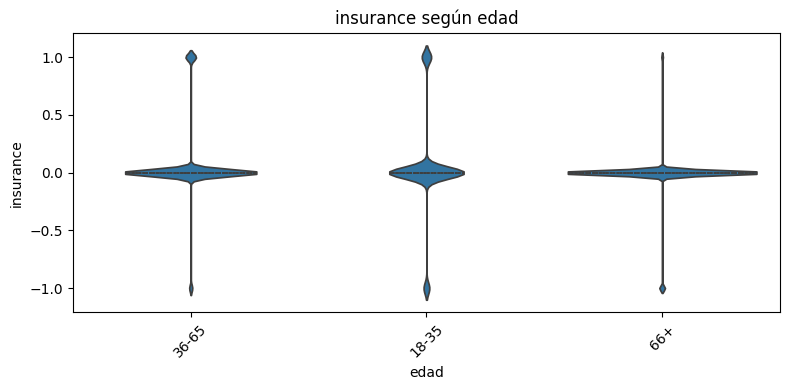

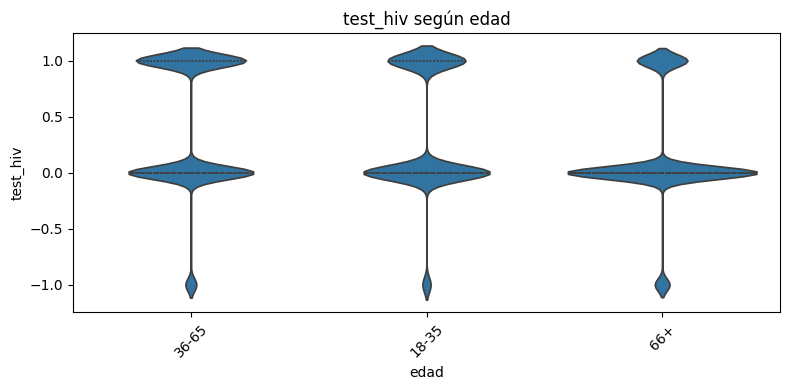

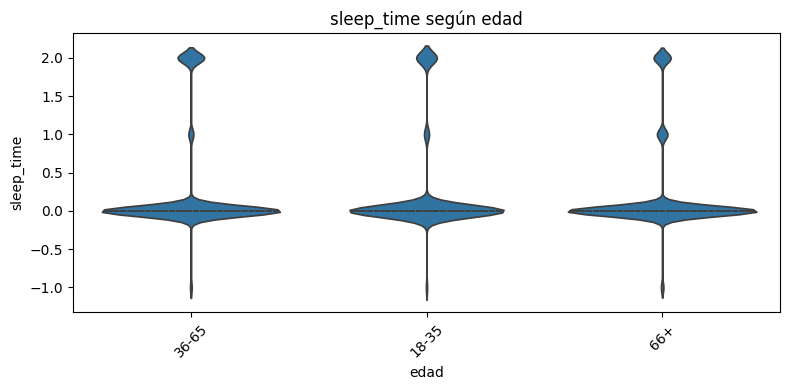

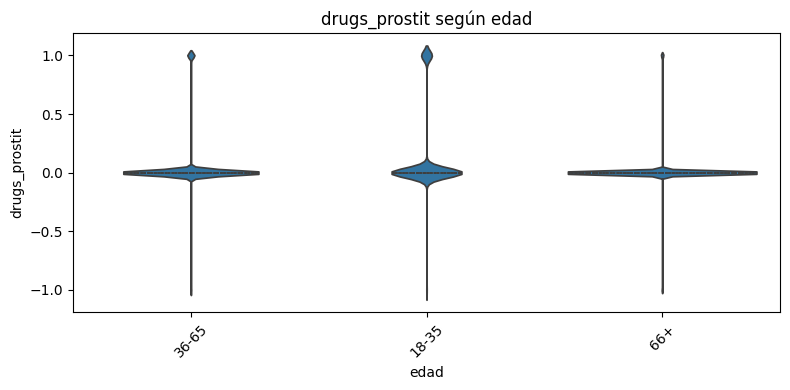

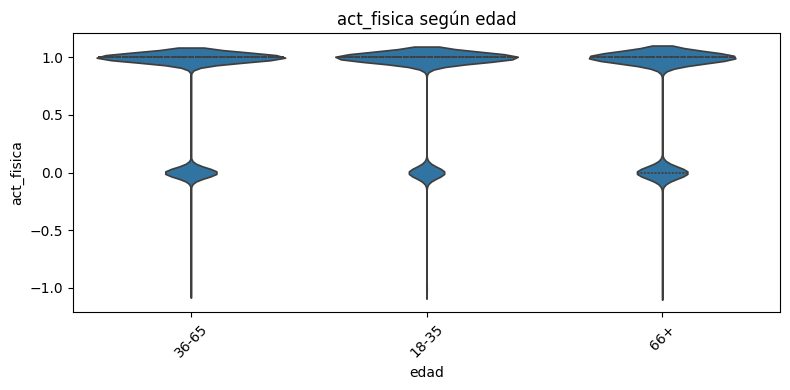

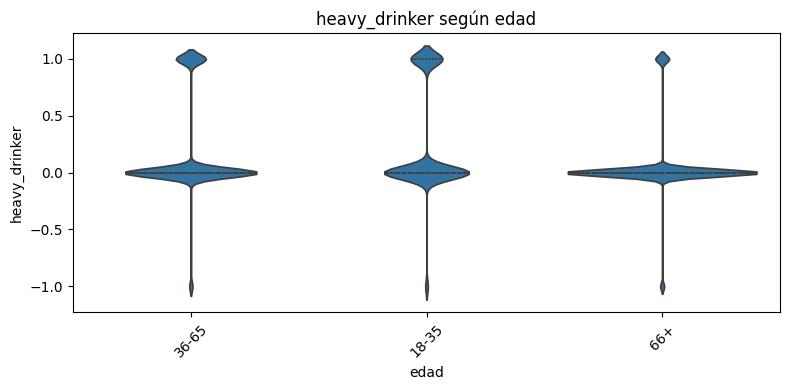

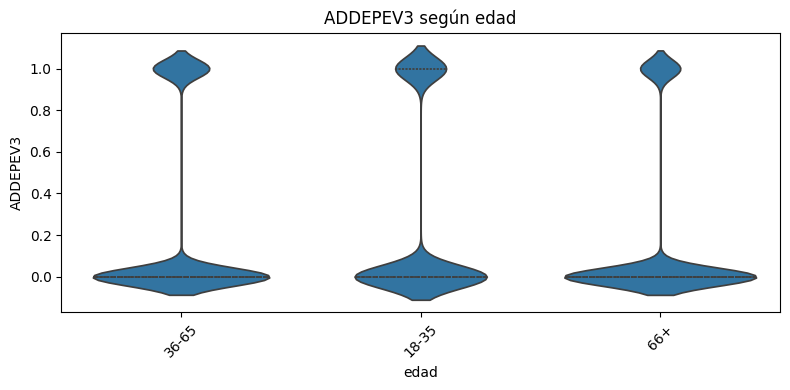

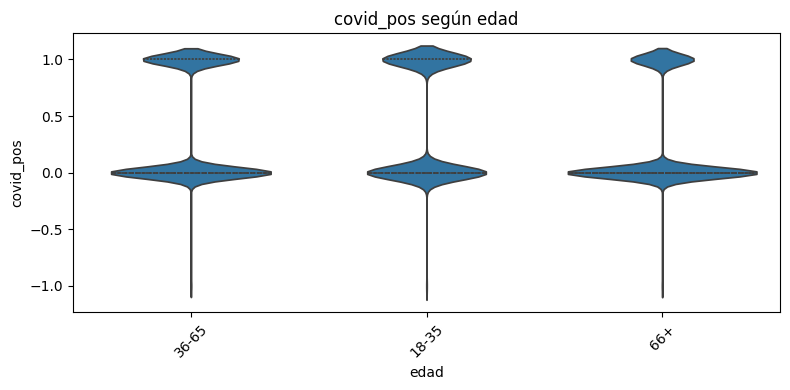

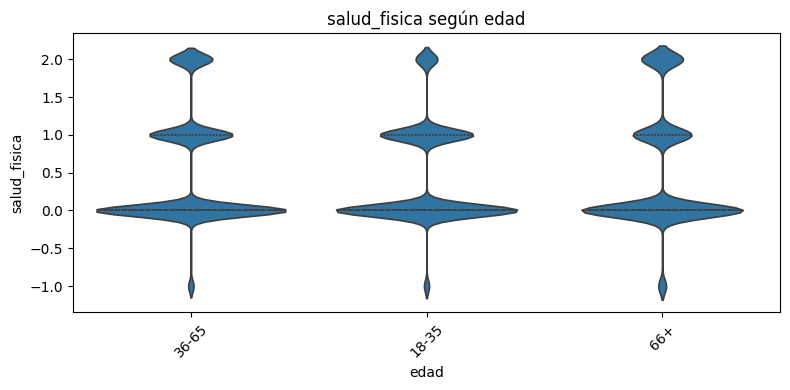

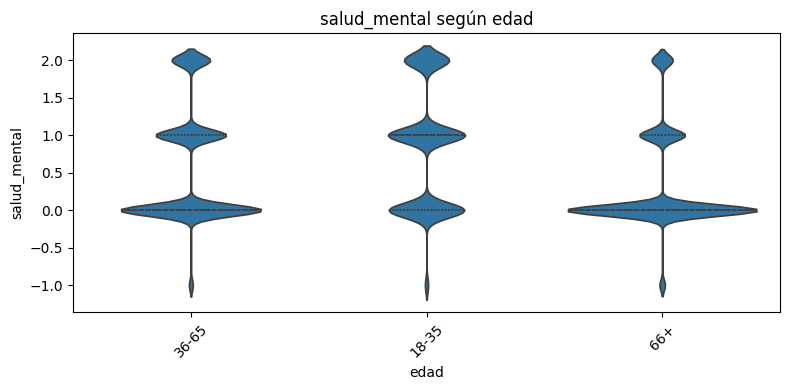

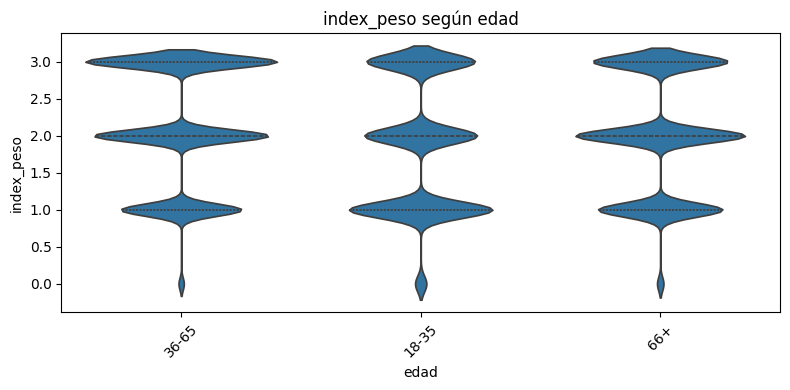

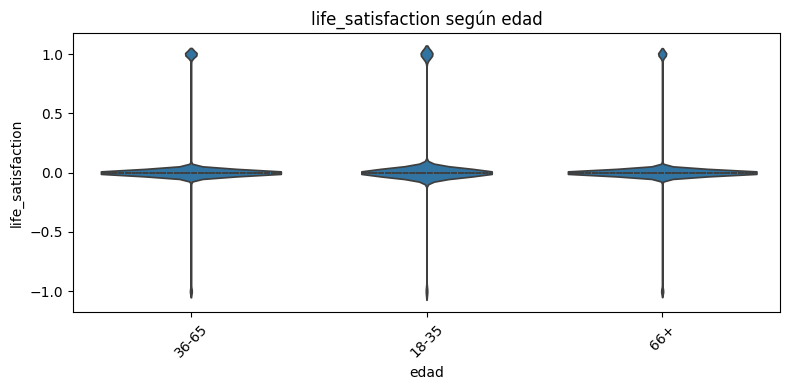

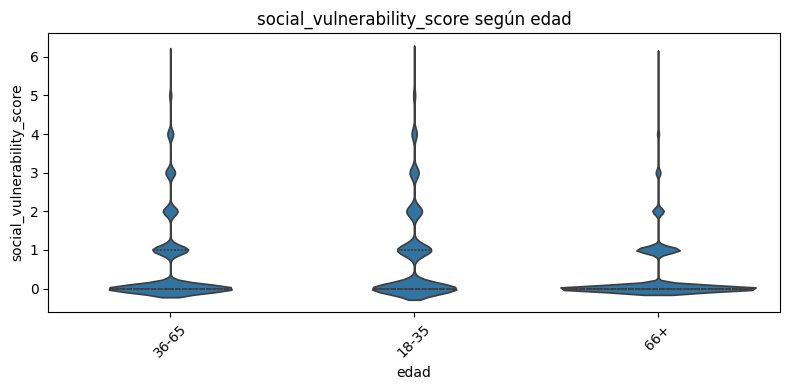

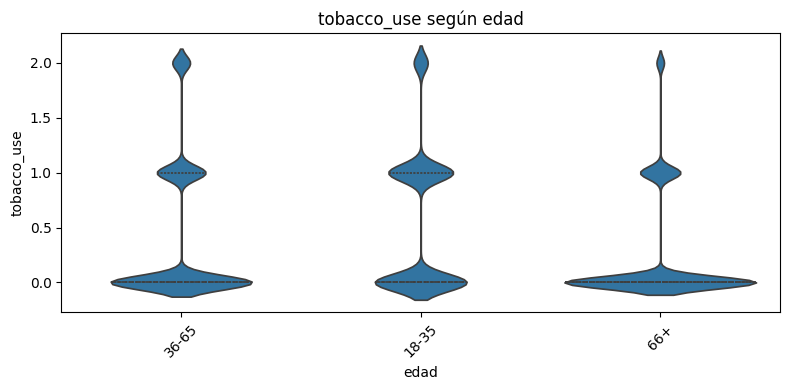

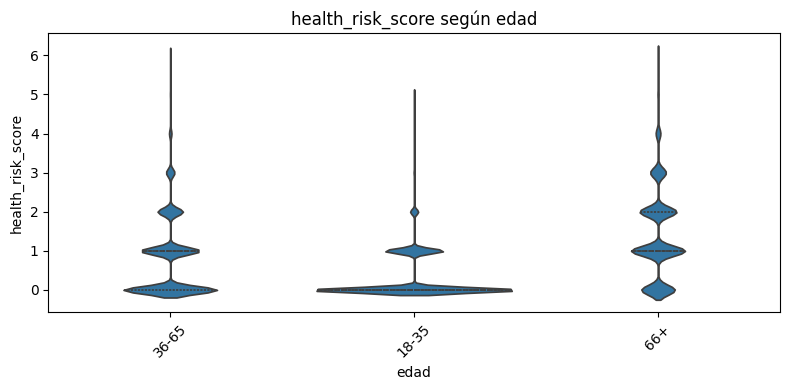

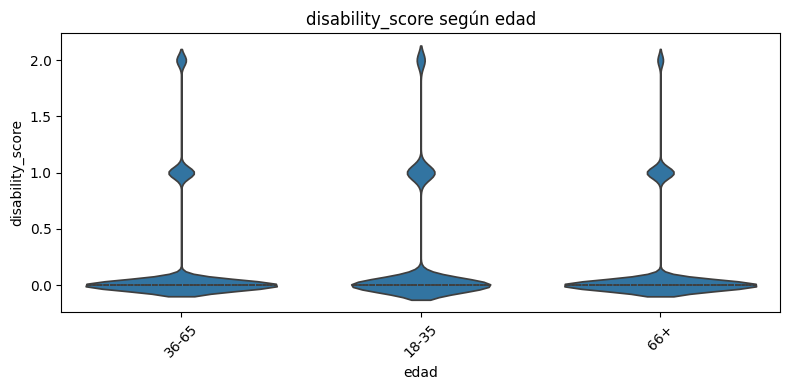

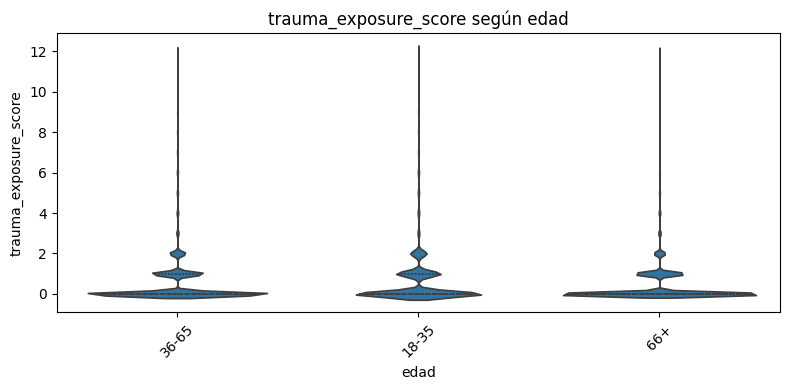

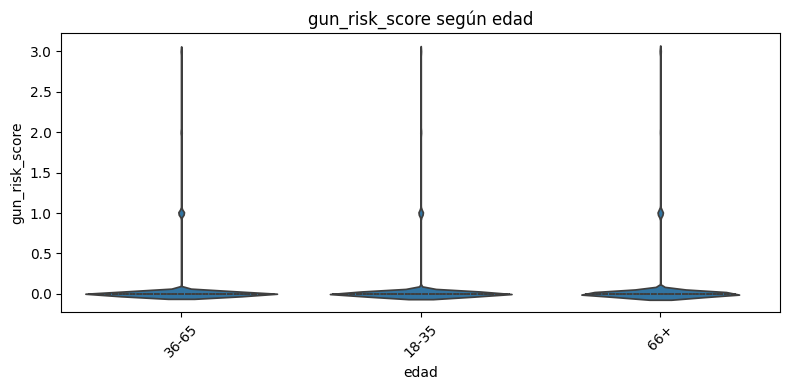

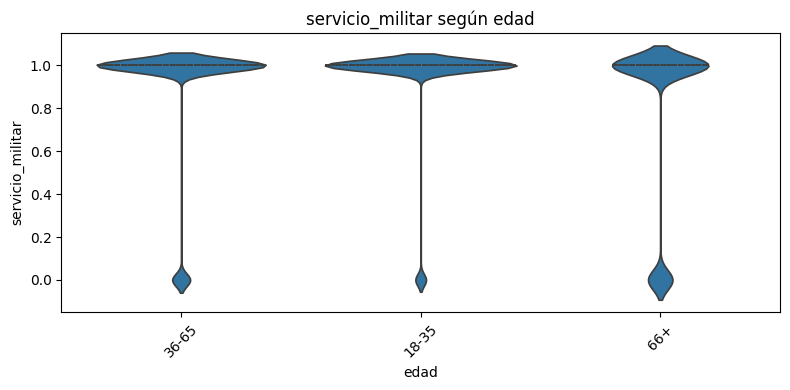

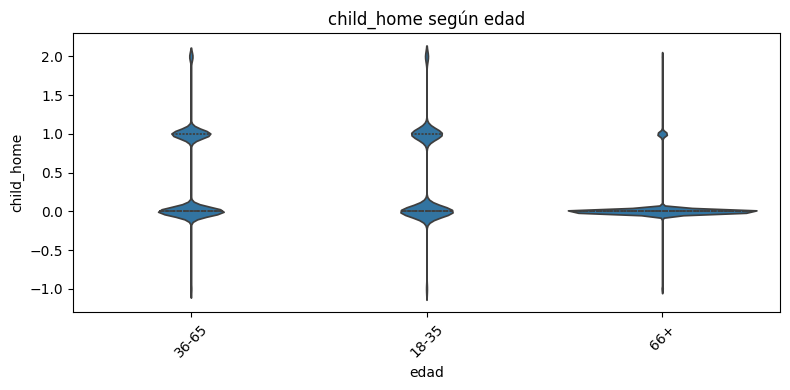

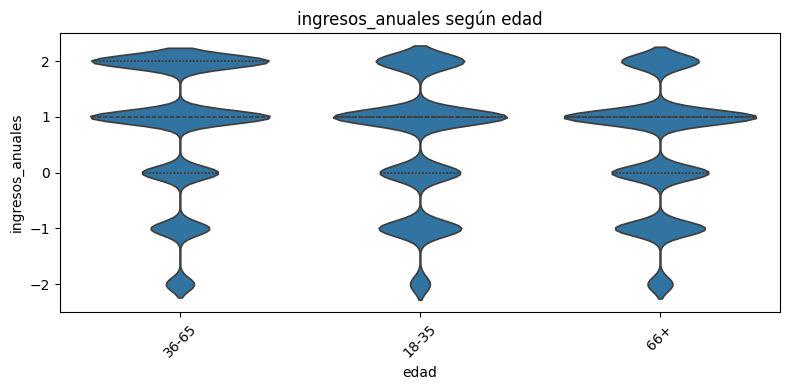

In [ ]:
for cat in categoricas:
    for num in numericas:
        plt.figure(figsize=(8, 4))
        sns.violinplot(data=df, x=cat, y=num, inner='quartile')
        plt.xticks(rotation=45)
        plt.title(f'{num} según {cat}')
        plt.tight_layout()
        plt.show()


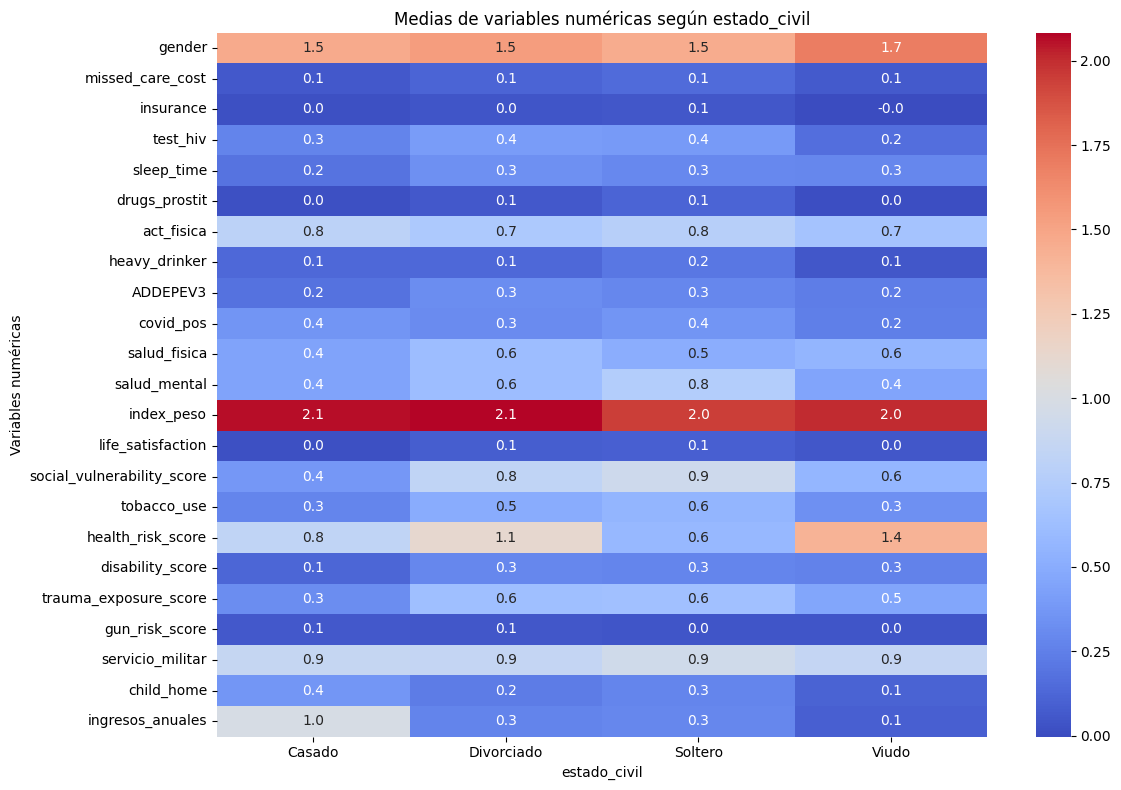

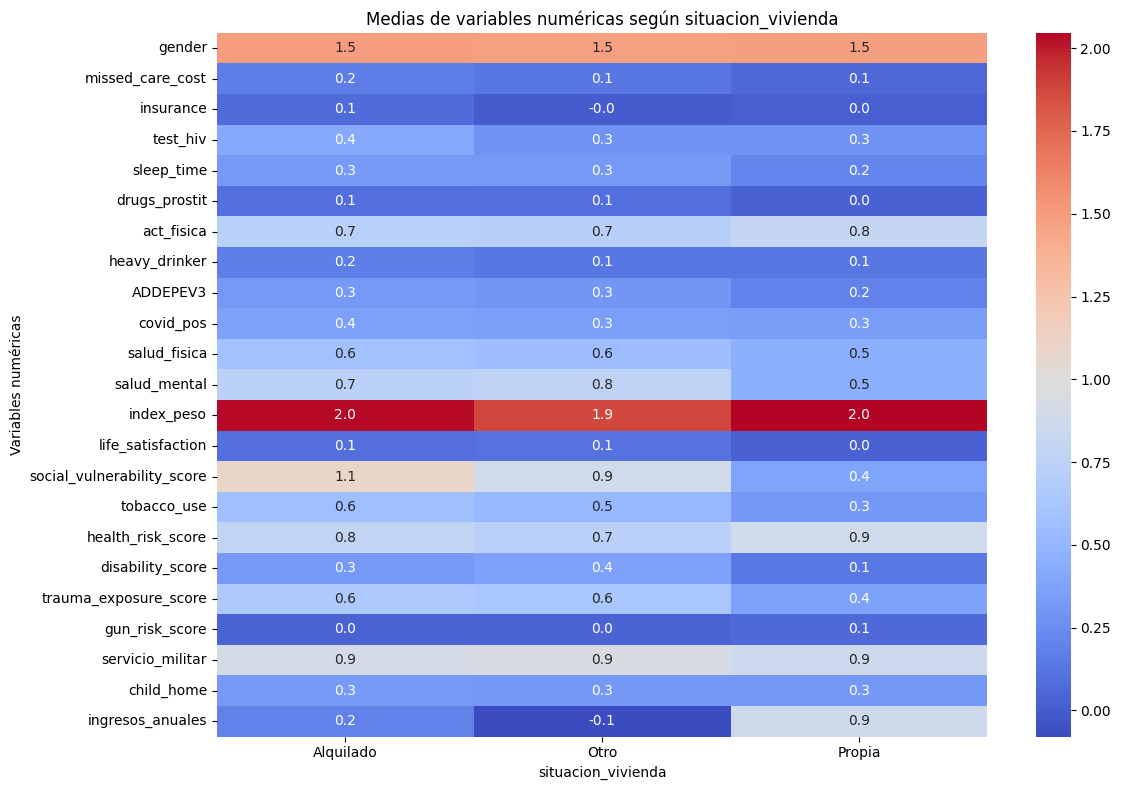

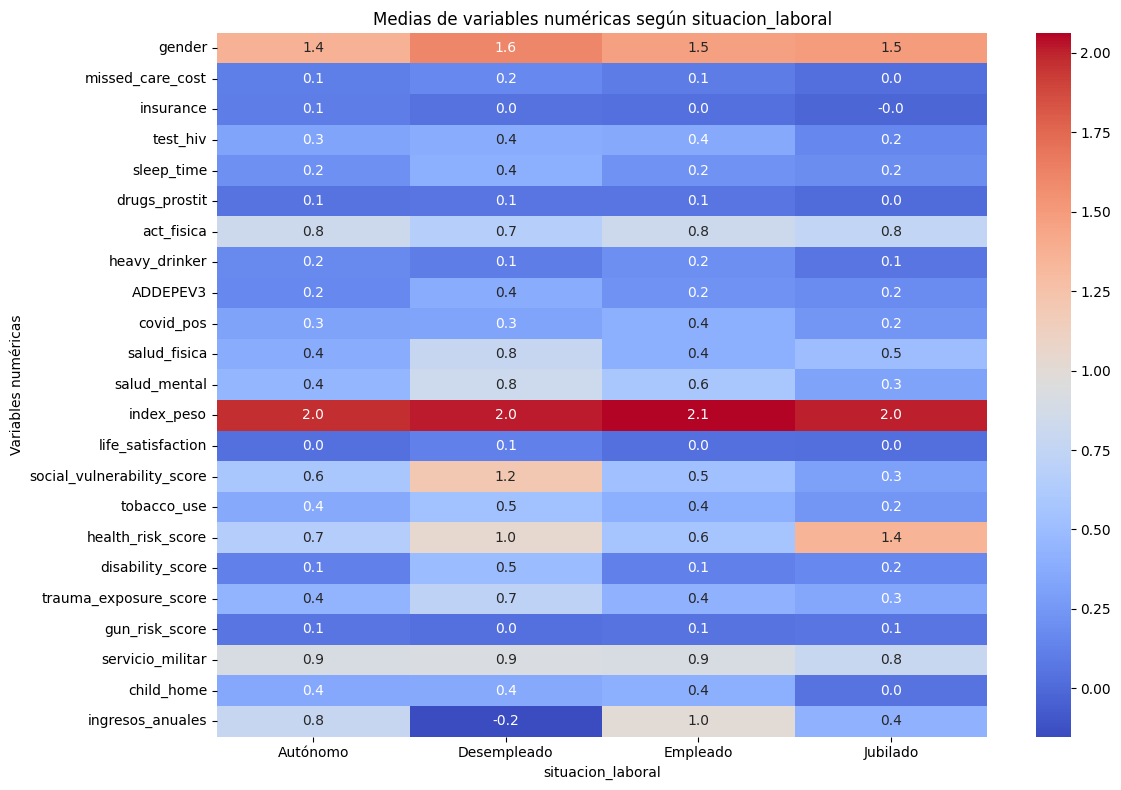

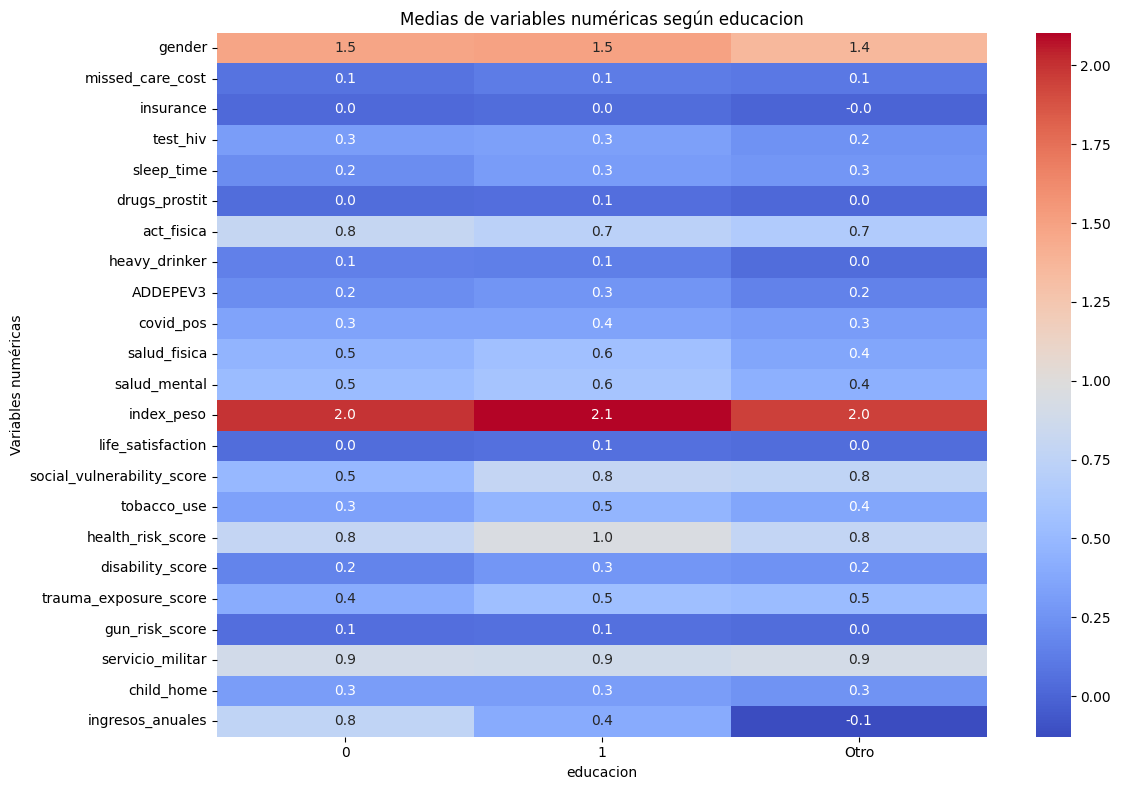

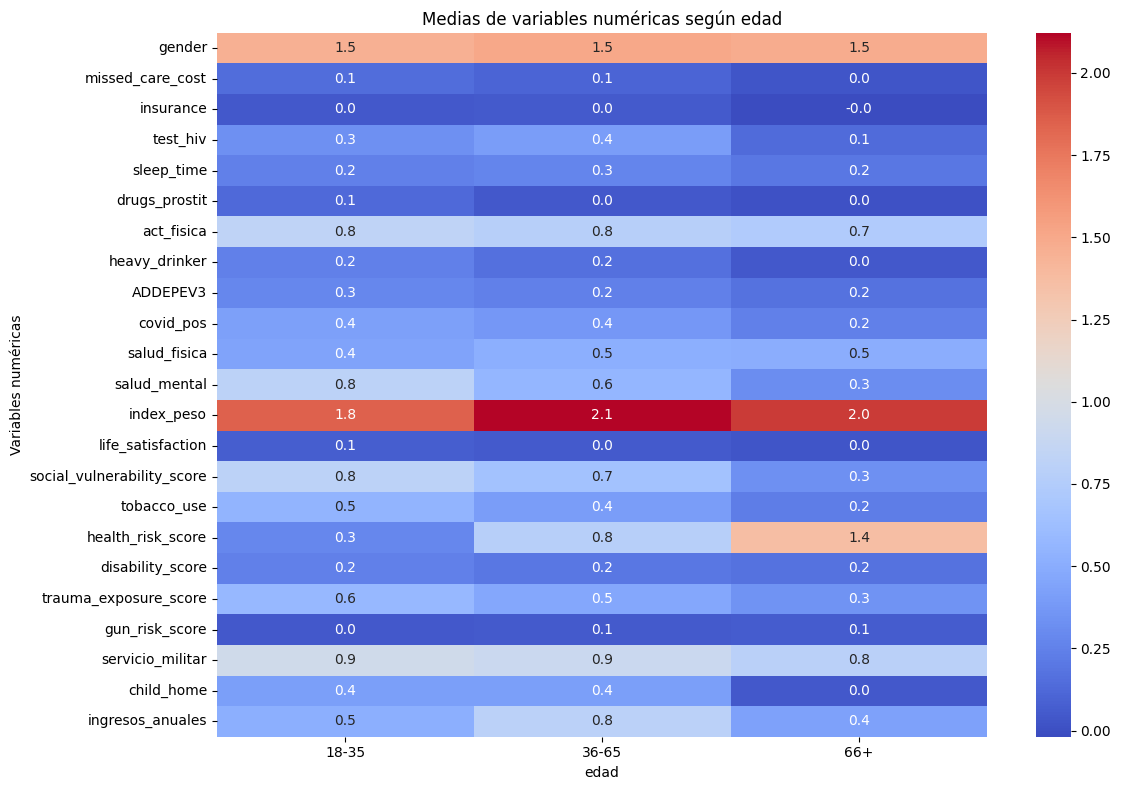

In [ ]:
for cat in categoricas:
    resumen = df.groupby(cat)[numericas].mean().T
    plt.figure(figsize=(12, 8))
    sns.heatmap(resumen, cmap='coolwarm', annot=True, fmt=".1f")
    plt.title(f'Medias de variables numéricas según {cat}')
    plt.xlabel(cat)
    plt.ylabel('Variables numéricas')
    plt.tight_layout()
    plt.show()